In [143]:
!pip install -U numpy==1.26.4 catboost shap optuna --quiet

# –ü–ª–∞–Ω –¥–æ–º–∞—à–Ω–∏—Ö –∑–∞–¥–∞–Ω–∏–π


- –û–ø–∏—Å–∞–Ω–∏–µ –∑–∞–¥–∞—á–∏ –∏ –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –¥–∞–Ω–Ω—ã–º–∏
- –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 1. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 2. –ü—Ä–æ–≥–Ω–æ–∑ –≤—Ä–µ–º–µ–Ω–∏ –∏ –≤–∏–¥–∞ –ø–æ–ª–æ–º–∫–∏ –º–∞—à–∏–Ω, –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ ML-–º–æ–¥–µ–ª–∏
- –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 3. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è. –¢—é–Ω–∏–Ω–≥ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é `Optuna`
- –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 4. –ë–ª–µ–Ω–¥–∏–Ω–≥
- –û—Ç–ø—Ä–∞–≤–∫–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –Ω–∞ –ª–∏–¥–µ—Ä–±–æ—Ä–¥ –Ω–∞ Kaggle
- –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 5. –ü–∞—Ä—Å–∏–Ω–≥ –≤–Ω–µ—à–Ω–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–∞–º—è—Ç–∏


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
import shap
import optuna

# <center id="part0"> –û–ø–∏—Å–∞–Ω–∏–µ –∑–∞–¥–∞—á–∏

**–ü—Ä–µ–¥—ã—Å—Ç–æ—Ä–∏—è:**  –º—ã —Ä–∞–±–æ—Ç–∞–µ–º —Å –∫–∞—Ä—à–µ—Ä–∏–Ω–≥–æ–≤–æ–π –∫–æ–º–ø–∞–Ω–∏–µ–π, –∫–æ—Ç–æ—Ä–∞—è —É–ø—Ä–∞–≤–ª—è–µ—Ç –∫—Ä—É–ø–Ω—ã–º –∞–≤—Ç–æ–ø–∞—Ä–∫–æ–º –º–∞—à–∏–Ω. –ù–∞—à–∞ —Ü–µ–ª—å ‚Äî –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å –¥–ª–∏—Ç–µ–ª—å–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã –ø—Ä–æ—Å—Ç–æ—è –º–∞—à–∏–Ω –∏–∑-–∑–∞ –ø–æ–ª–æ–º–æ–∫ —á–µ—Ä–µ–∑ —Å–≤–æ–µ–≤—Ä–µ–º–µ–Ω–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ —Ä–µ–º–æ–Ω—Ç.


**–ò–¥–µ—è –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –ø—Ä–æ–±–ª–µ–º—ã:** —Å–æ–∑–¥–∞—Ç—å –ø—Ä–∏–æ—Ä–∏—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Å–ø–∏—Å–æ–∫ –æ–±—Ö–æ–¥–∞ –º–∞—à–∏–Ω. –≠—Ç–æ—Ç —Å–ø–∏—Å–æ–∫ –ø–æ–º–æ–∂–µ—Ç —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –±—Ä–∏–≥–∞–¥–µ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–∏—Ç—å—Å—è –Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è—Ö, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω–æ –≤—ã–π–¥—É—Ç –∏–∑ —Å—Ç—Ä–æ—è –≤ –±–ª–∏–∂–∞–π—à–µ–µ –≤—Ä–µ–º—è.


**–ö–∞–∫ –∫–æ–º–ø–∞–Ω–∏—è —Ä–µ—à–∞–µ—Ç –∑–∞–¥–∞—á—É:**

* –°–æ–±–∏—Ä–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –æ –ø–æ–µ–∑–¥–∫–∞—Ö –∏ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –º–∞—à–∏–Ω –¥–æ –ø–æ–ª–æ–º–æ–∫.

* –ù–∞–Ω–∏–º–∞–µ—Ç Data Scientist, —á—Ç–æ–±—ã –æ–Ω —Å–º–æ–≥ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∞ –ø–æ–ª–æ–º–æ–∫.

**–í–∞–∂–Ω—ã–π –º–æ–º–µ–Ω—Ç**: –∑–∞–¥–∞—á–∏ —ç—Ç–æ–≥–æ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞ (Data Scientist) –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –≤—ã–ø–æ–ª–Ω—è—Ç—å –≤–∞–º.

## <center> –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –¥–∞–Ω–Ω—ã–º–∏

### –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–æ –º–∞—à–∏–Ω—ã —Å —Ç–∞—Ä–≥–µ—Ç–æ–º (–æ—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Å–µ—Ç)

In [145]:
car_train = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv')
car_train.sample(5)

car_id            model car_type fuel_type  car_rating  \
1886  W-1602334H      Smart Coupe  economy    petrol        4.64   
1052  k-2063559v        Kia Rio X  economy    petrol        6.30   
686   r-7396117p      Smart Coupe  economy    petrol        5.60   
2126  u24432042k   Kia Rio X-line  economy    petrol        3.06   
1211  z-1435869q  Hyundai Solaris  economy    petrol        4.08   

      year_to_start  riders  year_to_work  target_reg     target_class  
1886           2015   88230          2020       32.97      engine_fuel  
1052           2014   68270          2019       50.96     engine_check  
686            2017  121467          2016       84.20      another_bug  
2126           2013   41027          2020       26.58        break_bug  
1211           2014   57648          2018       63.14  engine_ignition

- `car_id` ‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –º–∞—à–∏–Ω—ã
- `model` / `car_type` / `fuel_type` ‚Äî –º–∞—Ä–∫–∞, –∫–ª–∞—Å—Å –∏ —Ç–∏–ø —Ç–æ–ø–ª–∏–≤–∞ –º–∞—à–∏–Ω—ã
- `car_rating` / `riders` ‚Äî –æ–±—â–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∏ –æ–±—â–µ–µ —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ –∫ –∫–æ–Ω—Ü—É 2021 –≥–æ–¥–∞
- `year_to_start` / `year_to_work` ‚Äî –≥–æ–¥ –≤—ã–ø—É—Å–∫–∞ –º–∞—à–∏–Ω—ã –∏ –≥–æ–¥ –Ω–∞—á–∞–ª–∞ —Ä–∞–±–æ—Ç—ã –≤ –∞–≤—Ç–æ–ø–∞—Ä–∫–µ
- `target_reg` ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –¥–æ –ø–æ–ª–æ–º–∫–∏
- `target_class` ‚Äî –∫–ª–∞—Å—Å –ø–æ–ª–æ–º–∫–∏ (–≤—Å–µ–≥–æ 9 –≤–∏–¥–æ–≤)

### –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–æ –ø–æ–µ–∑–¥–∫–∏

In [146]:
rides_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv')
rides_info.sample(5)

user_id      car_id ride_id   ride_date  rating  ride_duration  \
114754  t97368556l  I-2073229s     t1e  2020-02-16    0.10             14   
522858  H16217319g  k56274815U     N1g  2020-03-27    7.57             47   
302179  b25477929Z  V-3922506p     I1t  2020-03-02    7.09             55   
594489  l11925894q  q-1501864D     A1H  2020-02-25    3.27             78   
700422  n15554380P  x-3347185z     z1v  2020-02-08    2.56             40   

        ride_cost  speed_avg  speed_max  stop_times     distance  refueling  \
114754        162         28  50.000000           1    97.460825          0   
522858        558         57  86.407024           0  2640.393650          0   
302179        545         40  50.400000           1  1849.523126          0   
594489        931         46  71.000000           4   908.857529          0   
700422        634         47  56.000000           1  1222.193912          0   

        user_ride_quality  deviation_normal  
114754         -11.137322            -0.340  
522858           4.548500            -6.398  
302179           2.023876            -4.690  
594489           3.941400           -13.221  
700422                NaN           -33.977

- `user_id` / `car_id` / `ride_id` ‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã –≤–æ–¥–∏—Ç–µ–ª—è, –º–∞—à–∏–Ω—ã, –ø–æ–µ–∑–¥–∫–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ
- `ride_date` / `rating` ‚Äî –¥–∞—Ç–∞ –ø–æ–µ–∑–¥–∫–∏ –∏ —Ä–µ–π—Ç–∏–Ω–≥, –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–π –≤–æ–¥–∏—Ç–µ–ª–µ–º
- `ride_duration` / `distance` / `ride_cost` ‚Äî  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (–≤—Ä–µ–º—è),  –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ, —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø–æ–µ–∑–¥–∫–∏
- `speed_avg` / `speed_max` ‚Äî —Å—Ä–µ–¥–Ω—è—è –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ
- `stop_times` / `refueling` ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Å—Ç–∞–Ω–æ–≤–æ–∫ (–ø–∞—É–∑—ã) –∏ —Ñ–ª–∞–≥: –±—ã–ª–∞ –ª–∏ –¥–æ–∑–∞–ø—Ä–∞–≤–∫–∞
- `user_ride_quality` ‚Äî –æ—Ü–µ–Ω–∫–∞ –º–∞–Ω–µ—Ä—ã –≤–æ–∂–¥–µ–Ω–∏—è –≤–æ–¥–∏—Ç–µ–ª—è –º–∞—à–∏–Ω—ã, –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–∞—è —Å–∫–æ—Ä–∏–Ω–≥–æ–≤–æ–π ML-—Å–∏—Å—Ç–µ–º–æ–π —Å–µ—Ä–≤–∏—Å–∞
- `deviation_normal` ‚Äî –æ–±—â–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –¥–∞—Ç—á–∏–∫–æ–≤ –æ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –º–∞—à–∏–Ω—ã, –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —ç—Ç–∞–ª–æ–Ω–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π (–Ω–æ—Ä–º—ã)

### –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–æ –≤–æ–¥–∏—Ç–µ–ª–µ–π

In [147]:
driver_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv')
driver_info.sample(5)

age  user_rating  user_rides  user_time_accident     user_id  sex  \
11757   42          7.5        1090                 6.0  t10790732A    0   
7564    34          7.9         753                63.0  Q22113350Y    0   
1290    31          6.1        1104                 3.0  J18197951o    1   
6852    34          8.9        1691                 6.0  R21087943r    0   
9812    18          8.1        1673                12.0  o85581706A    1   

      first_ride_date  
11757       2019-1-30  
7564        2019-4-28  
1290       2020-11-28  
6852        2021-7-27  
9812         2018-6-5

- `user_id` / `age` / `sex` ‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –≤–æ–∑—Ä–∞—Å—Ç –∏ –ø–æ–ª –≤–æ–¥–∏—Ç–µ–ª—è, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ
- `user_rating` ‚Äî –æ–±—â–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∑–∞ –≤—Å–µ –ø–æ–µ–∑–¥–∫–∏ –∫ –∫–æ–Ω—Ü—É 2021 –≥–æ–¥–∞
- `user_rides` ‚Äî –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫ –∫ –∫–æ–Ω—Ü—É 2021 –≥–æ–¥–∞
- `user_time_accident` ‚Äî —á–∏—Å–ª–æ –∏–Ω—Ü–∏–¥–µ–Ω—Ç–æ–≤ (—ç—Ç–æ –º–æ–≥–ª–∏ –±—ã—Ç—å –∞–≤–∞—Ä–∏–∏/—à—Ç—Ä–∞—Ñ—ã/—ç–≤–∞–∫—É–∞—Ü–∏—è –º–∞—à–∏–Ω—ã)  
- `first_ride_date` ‚Äî –¥–∞—Ç–∞ –ø–µ—Ä–≤–æ–π –ø–æ–µ–∑–¥–∫–∏

### –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–æ —Ä–µ–º–æ–Ω—Ç –º–∞—à–∏–Ω

In [148]:
fix_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/fix_info.csv')
fix_info.sample(5)

car_id worker_id          fix_date     work_type  destroy_degree  \
10414   Z95207161f        UD    2019-6-18 10:3     reparking             1.0   
34166   z-1790906x        QO  2020-10-20 21:43        repair             5.0   
9619    A-2110919g        HK    2019-6-14 23:0  refuel_check             1.0   
4431    N18957837j        FZ   2020-1-30 14:22     reparking             1.0   
121233  k81607148Q        OH     2019-1-22 0:0     reparking             8.0   

        work_duration  
10414              31  
34166              21  
9619               22  
4431               35  
121233             48

- `worker_id` / `car_id` ‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Ä–∞–±–æ—Ç–Ω–∏–∫–∞ –∏ –º–∞—à–∏–Ω—ã
- `work_type` / `work_duration` ‚Äî —Ç–∏–ø –∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (–≤ —á–∞—Å–∞—Ö) –ø—Ä–æ–≤–æ–¥–∏–º–æ–π —Ä–∞–±–æ—Ç—ã
- `destroy_degree` ‚Äî —Å—Ç–µ–ø–µ–Ω—å –∏–∑–Ω–æ—Å–∞/–ø–æ–≤—Ä–µ–∂–¥–µ–Ω–Ω–æ—Å—Ç–∏ –º–∞—à–∏–Ω—ã –≤ —Å–ª—É—á–∞–µ –ø–æ–ª–æ–º–∫–∏
- `fix_date` ‚Äî –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–º–æ–Ω—Ç–∞ (—Å–Ω—è—Ç–∏—è –º–∞—à–∏–Ω—ã —Å –ª–∏–Ω–∏–∏)

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 1. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

<center> <img src="https://ucarecdn.com/bf4c772d-b67a-42ae-a48b-cfd83910b0a2/" width=700>

<div class="alert alert-info">

**–¶–µ–ª—å –±–ª–æ–∫–∞** ‚Äî —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏ –¥–æ–±–∞–≤–∏—Ç—å –∏—Ö –∫ –æ—Å–Ω–æ–≤–Ω–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É, –ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

    
## 1. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ (6 –±–∞–ª–ª–æ–≤)

<div class="alert alert-info">

1. –í–æ–∑—å–º–∏—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç `rides_info` —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ –ø–æ–µ–∑–¥–∫–∞—Ö –∏ –ø—Ä–æ–≤–µ–¥–∏—Ç–µ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫—É –ø–æ –∫–∞–∂–¥–æ–π –º–∞—à–∏–Ω–µ –æ—Ç–¥–µ–ª—å–Ω–æ.

2. –î–ª—è –∫–∞–∂–¥–æ–π –º–∞—à–∏–Ω—ã (—Ç–æ –µ—Å—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ `car_id`) –ø–æ–¥—Å—á–∏—Ç–∞–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
  - –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥ –∑–∞ –≤—Å–µ –ø–æ–µ–∑–¥–∫–∏;
  - —Å—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∑–∞ –≤—Å–µ –ø–æ–µ–∑–¥–∫–∏;
  - –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –º–∞—à–∏–Ω–∞ –ø—Ä–æ–µ—Ö–∞–ª–∞;
  - –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å;
  - –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–π –º–∞—à–∏–Ω—ã.

3. –î–æ–±–∞–≤—å—Ç–µ –º–∏–Ω–∏–º—É–º 3 –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞ —Å–≤–æ–π –≤—ã–±–æ—Ä.

4. –°–¥–µ–ª–∞–π—Ç–µ —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü ‚Äî –≤—Å–ø–æ–º–Ω–∏—Ç–µ –ø—Ä–æ –º–µ—Ç–æ–¥—ã —Å–æ–µ–¥–∏–Ω–µ–Ω–∏—è –∏ –≤—ã–±–µ—Ä–∏—Ç–µ –ø–æ–¥—Ö–æ–¥—è—â–∏–π –¥–ª—è —ç—Ç–æ–≥–æ —Å–ª—É—á–∞—è.

5. –ü–æ–¥–∫–ª—é—á–∏—Ç–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø—Ä–æ –≤–æ–¥–∏—Ç–µ–ª–µ–π (`driver_info`) –∏ –ø—Ä–æ —Ä–µ–º–æ–Ω—Ç –º–∞—à–∏–Ω (`fix_info`). –î–æ–±–∞–≤—å—Ç–µ –º–∏–Ω–∏–º—É–º 3 –ª—é–±—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å –∫–∞–∂–¥–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞.

6. **–û–ë–Ø–ó–ê–¢–ï–õ–¨–ù–û!** –ü—Ä–æ–≤–µ—Ä—å—Ç–µ, —á—Ç–æ –∫–æ–ª-–≤–æ —Å—Ç—Ä–æ–∫ –≤ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ —Ä–∞–≤–Ω–æ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–º—É –∫–æ–ª-–≤—É —Å—Ç—Ä–æ–∫ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ car_train. –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –Ω–µ—Ç –¥—É–±–ª–µ–π. (–ó–∞ —ç—Ç–æ –±—É–¥—É—Ç —Å–Ω–∏–∂–∞—Ç—å –±–∞–ª–ª—ã)


<h4> –ö—Ä–∏—Ç–µ—Ä–∏–∏ –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è </h4>
    
- –î–æ–±–∞–≤–ª–µ–Ω—ã 5 –æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã—Ö –∏ –º–∏–Ω–∏–º—É–º 3 –ª—é–±—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ `rides_info` ‚Äî 2 –±–∞–ª–ª–∞.
- –î–æ–±–∞–≤–ª–µ–Ω—ã –º–∏–Ω–∏–º—É–º 3 –ª—é–±—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ `driver_info` ‚Äî 2 –±–∞–ª–ª–∞.
- –î–æ–±–∞–≤–ª–µ–Ω—ã –º–∏–Ω–∏–º—É–º 3 –ª—é–±—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ `fix_info` ‚Äî 2 –±–∞–ª–ª–∞.

</div>

<div class="alert alert-success">
    
<h4> –°–æ–≤–µ—Ç—ã –ø–æ Feature Engineering</h4>
    
- –ù–∞—á–∏–Ω–∞–π—Ç–µ —Å —Å—ã—Ä—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
- –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –≤—Å–µ –¥–æ—Å—Ç—É–ø–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ. –ü–æ–∫—Ä—ã–≤–∞–π—Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –≤—Å—é –∏–º–µ—é—â—É—é—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –≤ –¥–∞–Ω–Ω—ã—Ö.
- –§–æ—Ä–º—É–ª–∏—Ä—É–π—Ç–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—è: –æ—Ç —á–µ–≥–æ –∑–∞–≤–∏—Å–∏—Ç —Ç–∞—Ä–≥–µ—Ç?
- –°–º–æ—Ç—Ä–∏—Ç–µ –≤–∏–∑—É–∞–ª—å–Ω–æ –Ω–∞ –∫–ª–∞—Å—Å—ã/–æ—à–∏–±–∫–∏ –∏ –¥–µ–ª–∞–π—Ç–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—è. –ö–∞–∫–∏–µ –ø–æ–ª–µ–∑–Ω—ã?
- –ü–æ–º–Ω–∏—Ç–µ, —á—Ç–æ —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—Ä–µ–¥–Ω–æ. –ü–æ—Ç–æ–º –ø—Ä–∏–¥–µ—Ç—Å—è –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤—ã–≤–∞—Ç—å.
    
<h4> –ü–æ–ª–µ–∑–Ω—ã–µ –∏—Å—Ç–æ—á–Ω–∏–∫–∏ </h4>
    
- –ó–∞–Ω—è—Ç–∏–µ –ø—Ä–æ Feature Engineering.
- –ó–∞–Ω—è—Ç–∏–µ –ø—Ä–æ Feature Selection.
- [Max Kuhn and Kjell Johnson. Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/).

### –ü—Ä–∏–º–µ—Ä —Ä–∞—Å—á–µ—Ç–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞

In [149]:
# –ë–∞–∑–æ–≤–∞—è –∞–≥—Ä–µ–≥–∞—Ü–∏—è –ø–æ car_id
rides_agg = rides_info.groupby('car_id').agg(
    min_rating=('rating', 'min'),
    mean_rating=('rating', 'mean'),
    total_distance=('distance', 'sum'),
    max_speed=('speed_max', 'max'),
    total_rides=('ride_id', 'count')
).reset_index()

rides_agg.head()

car_id  min_rating  mean_rating  total_distance   max_speed  \
0  A-1049127W         0.1     4.255172    1.125753e+07  179.729652   
1  A-1079539w         0.1     4.088046    1.912765e+07  184.505566   
2  A-1162143G         0.1     4.662299    2.995194e+06  180.000000   
3  A-1228282M         0.1     4.225172    1.793685e+07  182.446070   
4  A-1339912r         0.1     4.690115    1.202552e+07  152.000000   

   total_rides  
0          174  
1          174  
2          174  
3          174  
4          174

In [150]:
# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ car_id –∏ —Ä–∞—Å—á—ë—Ç –æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
rides_agg = rides_info.groupby('car_id').agg(
    min_rating=('rating', 'min'),             # –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥
    mean_rating=('rating', 'mean'),           # —Å—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥
    total_distance=('distance', 'sum'),       # —Å—É–º–º–∞—Ä–Ω–∞—è –¥–∏—Å—Ç–∞–Ω—Ü–∏—è
    max_speed=('speed_max', 'max'),           # –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å
    total_rides=('ride_id', 'count')          # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫
).reset_index()

rides_agg.head()

car_id  min_rating  mean_rating  total_distance   max_speed  \
0  A-1049127W         0.1     4.255172    1.125753e+07  179.729652   
1  A-1079539w         0.1     4.088046    1.912765e+07  184.505566   
2  A-1162143G         0.1     4.662299    2.995194e+06  180.000000   
3  A-1228282M         0.1     4.225172    1.793685e+07  182.446070   
4  A-1339912r         0.1     4.690115    1.202552e+07  152.000000   

   total_rides  
0          174  
1          174  
2          174  
3          174  
4          174

In [151]:
# –°–æ–µ–¥–∏–Ω–µ–Ω–∏–µ car_train –∏ rides_agg –ø–æ car_id
car_train_merged = car_train.merge(rides_agg, on='car_id', how='left')

# –ü—Ä–æ–≤–µ—Ä–∫–∞
print(f'–†–∞–∑–º–µ—Ä car_train: {car_train.shape}')
print(f'–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è: {car_train_merged.shape}')

–†–∞–∑–º–µ—Ä car_train: (2337, 10)
–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è: (2337, 15)


In [152]:
car_train_merged

car_id              model  car_type fuel_type  car_rating  \
0     y13744087j     Kia Rio X-line   economy    petrol        3.78   
1     O41613818T         VW Polo VI   economy    petrol        3.90   
2     d-2109686j    Renault Sandero  standart    petrol        6.30   
3     u29695600e  Mercedes-Benz GLC  business    petrol        4.04   
4     N-8915870N    Renault Sandero  standart    petrol        4.70   
...          ...                ...       ...       ...         ...   
2332  j21246192N      Smart ForFour   economy    petrol        4.38   
2333  h-1554287F            Audi A4   premium    petrol        4.30   
2334  A15262612g            Kia Rio   economy    petrol        3.88   
2335  W-2514493U    Renault Sandero  standart    petrol        4.50   
2336  z-1337463D            VW Polo   economy    petrol        3.94   

      year_to_start  riders  year_to_work  target_reg  target_class  \
0              2015   76163          2021      108.53   another_bug   
1              2015   78218          2021       35.20   electro_bug   
2              2012   23340          2017       38.62    gear_stick   
3              2011    1263          2020       30.34   engine_fuel   
4              2012   26428          2017       30.45   engine_fuel   
...             ...     ...           ...         ...           ...   
2332           2017  121239          2018       25.48   wheel_shake   
2333           2016  107793          2020       69.26  engine_check   
2334           2015   80234          2019       46.03    gear_stick   
2335           2014   60048          2020       77.19   another_bug   
2336           2015   92312          2016       54.68  engine_check   

      min_rating  mean_rating  total_distance   max_speed  total_rides  
0           0.10     4.737759    1.214131e+07  180.855726          174  
1           0.00     4.480517    1.803909e+07  187.862734          174  
2           0.10     4.768391    1.588366e+07  102.382857          174  
3           0.10     3.880920    1.651883e+07  172.793237          174  
4           0.10     4.181149    1.398317e+07  203.462289          174  
...          ...          ...             ...         ...          ...  
2332        0.10     4.608908    1.739222e+07  141.502350          174  
2333        0.10     4.683793    1.174052e+07  155.000000          174  
2334        0.10     4.655345    1.202022e+07  104.180940          174  
2335        0.10     4.638333    1.788307e+07  200.000000          174  
2336        0.39     4.635460    1.981081e+07  171.000000          174  

[2337 rows x 15 columns]

In [153]:
# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –≤–æ–¥–∏—Ç–µ–ª—è—Ö –∫ –ø–æ–µ–∑–¥–∫–∞–º
rides_with_drivers = rides_info.merge(driver_info, on='user_id', how='left')

# –ê–≥—Ä–µ–≥–∞—Ü–∏—è –ø–æ car_id
drivers_agg = rides_with_drivers.groupby('car_id').agg(
    driver_age_mean=('age', 'mean'),
    driver_rating_mean=('user_rating', 'mean'),
    driver_accident_mean=('user_time_accident', 'mean')
).reset_index()

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Å –æ—Å–Ω–æ–≤–Ω—ã–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–º
car_train_merged = car_train_merged.merge(drivers_agg, on='car_id', how='left')

car_train_merged

car_id              model  car_type fuel_type  car_rating  \
0     y13744087j     Kia Rio X-line   economy    petrol        3.78   
1     O41613818T         VW Polo VI   economy    petrol        3.90   
2     d-2109686j    Renault Sandero  standart    petrol        6.30   
3     u29695600e  Mercedes-Benz GLC  business    petrol        4.04   
4     N-8915870N    Renault Sandero  standart    petrol        4.70   
...          ...                ...       ...       ...         ...   
2332  j21246192N      Smart ForFour   economy    petrol        4.38   
2333  h-1554287F            Audi A4   premium    petrol        4.30   
2334  A15262612g            Kia Rio   economy    petrol        3.88   
2335  W-2514493U    Renault Sandero  standart    petrol        4.50   
2336  z-1337463D            VW Polo   economy    petrol        3.94   

      year_to_start  riders  year_to_work  target_reg  target_class  \
0              2015   76163          2021      108.53   another_bug   
1              2015   78218          2021       35.20   electro_bug   
2              2012   23340          2017       38.62    gear_stick   
3              2011    1263          2020       30.34   engine_fuel   
4              2012   26428          2017       30.45   engine_fuel   
...             ...     ...           ...         ...           ...   
2332           2017  121239          2018       25.48   wheel_shake   
2333           2016  107793          2020       69.26  engine_check   
2334           2015   80234          2019       46.03    gear_stick   
2335           2014   60048          2020       77.19   another_bug   
2336           2015   92312          2016       54.68  engine_check   

      min_rating  mean_rating  total_distance   max_speed  total_rides  \
0           0.10     4.737759    1.214131e+07  180.855726          174   
1           0.00     4.480517    1.803909e+07  187.862734          174   
2           0.10     4.768391    1.588366e+07  102.382857          174   
3           0.10     3.880920    1.651883e+07  172.793237          174   
4           0.10     4.181149    1.398317e+07  203.462289          174   
...          ...          ...             ...         ...          ...   
2332        0.10     4.608908    1.739222e+07  141.502350          174   
2333        0.10     4.683793    1.174052e+07  155.000000          174   
2334        0.10     4.655345    1.202022e+07  104.180940          174   
2335        0.10     4.638333    1.788307e+07  200.000000          174   
2336        0.39     4.635460    1.981081e+07  171.000000          174   

      driver_age_mean  driver_rating_mean  driver_accident_mean  
0           33.511494            8.229885             17.724138  
1           34.988506            7.988506              6.965517  
2           32.839080            7.843103              9.775862  
3           34.977011            8.524138             19.991304  
4           34.298851            8.112069             15.758333  
...               ...                 ...                   ...  
2332        32.632184            8.124138             20.203390  
2333        34.977011            8.150575             18.041322  
2334        33.287356            7.783908              8.804598  
2335        31.977011            8.084483             17.008547  
2336        33.890805            8.018966             14.700787  

[2337 rows x 18 columns]

In [154]:
print(f"–û–∂–∏–¥–∞–µ—Ç—Å—è: {car_train.shape[0]} —Å—Ç—Ä–æ–∫")
print(f"–§–∞–∫—Ç–∏—á–µ—Å–∫–∏: {car_train_merged.shape[0]} —Å—Ç—Ä–æ–∫")

–û–∂–∏–¥–∞–µ—Ç—Å—è: 2337 —Å—Ç—Ä–æ–∫
–§–∞–∫—Ç–∏—á–µ—Å–∫–∏: 2337 —Å—Ç—Ä–æ–∫


In [155]:
duplicates = car_train_merged['car_id'].duplicated().sum()
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ car_id: {duplicates}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ car_id: 0


In [156]:
fix_agg = fix_info.groupby('car_id').agg(
    fix_count=('fix_date', 'count'),                 # –ö–æ–ª-–≤–æ —Ä–µ–º–æ–Ω—Ç–æ–≤
    avg_destroy_degree=('destroy_degree', 'mean'),   # –°—Ä–µ–¥–Ω–∏–π –∏–∑–Ω–æ—Å
    total_work_duration=('work_duration', 'sum'),    # –°—É–º–º–∞—Ä–Ω–∞—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–µ–º–æ–Ω—Ç–∞
    unique_work_types=('work_type', 'nunique')       # –£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–∏–ø–æ–≤ —Ä–∞–±–æ—Ç
).reset_index()

fix_agg.head()

car_id  fix_count  avg_destroy_degree  total_work_duration  \
0  A-1049127W         35            2.714286                  962   
1  A-1079539w         34            4.329412                  931   
2  A-1162143G         34            3.705882                  946   
3  A-1228282M         34            2.908824                  838   
4  A-1339912r         34            3.044118                  973   

   unique_work_types  
0                  4  
1                  4  
2                  3  
3                  4  
4                  4

In [157]:
car_train_merged = car_train_merged.merge(fix_agg, on='car_id', how='left')

In [158]:
car_train_merged

car_id              model  car_type fuel_type  car_rating  \
0     y13744087j     Kia Rio X-line   economy    petrol        3.78   
1     O41613818T         VW Polo VI   economy    petrol        3.90   
2     d-2109686j    Renault Sandero  standart    petrol        6.30   
3     u29695600e  Mercedes-Benz GLC  business    petrol        4.04   
4     N-8915870N    Renault Sandero  standart    petrol        4.70   
...          ...                ...       ...       ...         ...   
2332  j21246192N      Smart ForFour   economy    petrol        4.38   
2333  h-1554287F            Audi A4   premium    petrol        4.30   
2334  A15262612g            Kia Rio   economy    petrol        3.88   
2335  W-2514493U    Renault Sandero  standart    petrol        4.50   
2336  z-1337463D            VW Polo   economy    petrol        3.94   

      year_to_start  riders  year_to_work  target_reg  target_class  ...  \
0              2015   76163          2021      108.53   another_bug  ...   
1              2015   78218          2021       35.20   electro_bug  ...   
2              2012   23340          2017       38.62    gear_stick  ...   
3              2011    1263          2020       30.34   engine_fuel  ...   
4              2012   26428          2017       30.45   engine_fuel  ...   
...             ...     ...           ...         ...           ...  ...   
2332           2017  121239          2018       25.48   wheel_shake  ...   
2333           2016  107793          2020       69.26  engine_check  ...   
2334           2015   80234          2019       46.03    gear_stick  ...   
2335           2014   60048          2020       77.19   another_bug  ...   
2336           2015   92312          2016       54.68  engine_check  ...   

      total_distance   max_speed  total_rides  driver_age_mean  \
0       1.214131e+07  180.855726          174        33.511494   
1       1.803909e+07  187.862734          174        34.988506   
2       1.588366e+07  102.382857          174        32.839080   
3       1.651883e+07  172.793237          174        34.977011   
4       1.398317e+07  203.462289          174        34.298851   
...              ...         ...          ...              ...   
2332    1.739222e+07  141.502350          174        32.632184   
2333    1.174052e+07  155.000000          174        34.977011   
2334    1.202022e+07  104.180940          174        33.287356   
2335    1.788307e+07  200.000000          174        31.977011   
2336    1.981081e+07  171.000000          174        33.890805   

      driver_rating_mean  driver_accident_mean  fix_count  avg_destroy_degree  \
0               8.229885             17.724138         35            3.048571   
1               7.988506              6.965517         35            2.917143   
2               7.843103              9.775862         35            3.740000   
3               8.524138             19.991304         35            4.085714   
4               8.112069             15.758333         35            3.880000   
...                  ...                   ...        ...                 ...   
2332            8.124138             20.203390         34            3.900000   
2333            8.150575             18.041322         34            1.935294   
2334            7.783908              8.804598         34            2.782353   
2335            8.084483             17.008547         34            3.441176   
2336            8.018966             14.700787         34            3.220588   

      total_work_duration  unique_work_types  
0                     933                  4  
1                     873                  5  
2                     915                  5  
3                    1007                  4  
4                     981                  4  
...                   ...                ...  
2332                  814                  4  
2333                  873                  4  
2334                  797                  4  
2335    

### –ò–¥–µ–∏ –¥–ª—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤


* `feature_min_max_diff` ‚Äî —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∏ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ `deviation_normal` –¥–ª—è –∫–∞–∂–¥–æ–π –º–∞—à–∏–Ω—ã
* `feature_corner` ‚Äî —É–≥–æ–ª –Ω–∞–∫–ª–æ–Ω–∞ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É `user_ride_quality` –¥–ª—è –∫–∞–∂–¥–æ–π –º–∞—à–∏–Ω—ã
* `feature_mean` ‚Äî —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ `deviation_normal` –¥–ª—è –∫–∞–∂–¥–æ–π –º–∞—à–∏–Ω—ã
* `feature_shift` ‚Äî —Ç–æ—á–∫–∞ –ø–µ—Ä–µ–≥–∏–±–∞/—Å–¥–≤–∏–≥–∞ –¥–ª—è `deviation_normal`
* `feature_start` ‚Äî –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–æ—á–∫–∏ —Å—Ç–∞—Ä—Ç–∞ –¥–ª—è `deviation_normal`
* `feature_nans` ‚Äî —Å—É–º–º–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ `...` –¥–ª—è –∫–∞–∂–¥–æ–π –º–∞—à–∏–Ω—ã
* `feature_quant` ‚Äî `X %` –∫–≤–∞–Ω—Ç–∏–ª—å –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ `...` –¥–ª—è –∫–∞–∂–¥–æ–π –º–∞—à–∏–Ω—ã

–ü–æ–¥—É–º–∞–π—Ç–µ, –∫–∞–∫–∏–µ –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–≥—É—Ç –æ–∫–∞–∑–∞—Ç—å—Å—è —Å–∞–º—ã–º–∏ –ø–æ–ª–µ–∑–Ω—ã–º–∏?

In [159]:
# YOUR CODE HERE
# –†–∞—Å—á—ë—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ deviation_normal –∏ user_ride_quality
rides_extra = rides_info.groupby('car_id').agg(
    feature_min_max_diff=('deviation_normal', lambda x: x.max() - x.min()),  # —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É max –∏ min
    feature_corner=('user_ride_quality', lambda x: np.polyfit(range(len(x)), x.fillna(0), 1)[0]),  # —É–≥–æ–ª –Ω–∞–∫–ª–æ–Ω–∞
    feature_mean=('deviation_normal', 'mean'),  # —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
    feature_shift=('deviation_normal', lambda x: x.diff().abs().idxmax() if len(x) > 1 else np.nan),  # —Ç–æ—á–∫–∞ –ø–µ—Ä–µ–≥–∏–±–∞ (–º–æ–∂–Ω–æ —É—Ç–æ—á–Ω–∏—Ç—å)
    feature_start=('deviation_normal', lambda x: x.iloc[0] if len(x) > 0 else np.nan),  # —Å—Ç–∞—Ä—Ç–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
    feature_nans=('deviation_normal', lambda x: x.isna().sum()),  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤
    feature_quant=('deviation_normal', lambda x: x.quantile(0.75))  # 75% –∫–≤–∞–Ω—Ç–∏–ª—å
).reset_index()

rides_extra

car_id  feature_min_max_diff  feature_corner  feature_mean  \
0     A-1049127W                31.688        0.013702     -6.136672   
1     A-1079539w                74.349       -0.163212     47.443270   
2     A-1162143G                46.177        0.016630     10.556425   
3     A-1228282M                64.898       -0.138497      9.810747   
4     A-1339912r                40.142       -0.056324     22.965937   
...          ...                   ...             ...           ...   
4245  z73688663a                67.991        0.039323    -13.846075   
4246  z73740510r                59.877        0.127216      7.026477   
4247  z86911952C                75.449       -0.080211    -25.382126   
4248  z91353693Z                60.076        0.085543     -8.031167   
4249  z91796444U                75.328        0.127757    -33.506908   

      feature_shift  feature_start  feature_nans  feature_quant  
0                99          2.909             0       -0.53250  
1               280         60.924             0       59.06075  
2               477         -1.219             0       17.22600  
3               613          6.644             0       25.68825  
4               798          0.490             0       31.29600  
...             ...            ...           ...            ...  
4245         738742          1.271             0       -7.52825  
4246         738919          1.685             0       21.40925  
4247         738996        -50.624             0      -14.24300  
4248         739258          5.755             0        4.79100  
4249         739484          1.764             0      -16.07150  

[4250 rows x 8 columns]

In [160]:
car_train_merged = car_train_merged.merge(rides_extra, on='car_id', how='left')
print("–§–æ—Ä–º–∞ –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è:", car_train_merged.shape)
print("–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ car_id:", car_train_merged['car_id'].duplicated().sum())

–§–æ—Ä–º–∞ –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è: (2337, 29)
–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ car_id: 0


In [161]:
car_train_merged

car_id              model  car_type fuel_type  car_rating  \
0     y13744087j     Kia Rio X-line   economy    petrol        3.78   
1     O41613818T         VW Polo VI   economy    petrol        3.90   
2     d-2109686j    Renault Sandero  standart    petrol        6.30   
3     u29695600e  Mercedes-Benz GLC  business    petrol        4.04   
4     N-8915870N    Renault Sandero  standart    petrol        4.70   
...          ...                ...       ...       ...         ...   
2332  j21246192N      Smart ForFour   economy    petrol        4.38   
2333  h-1554287F            Audi A4   premium    petrol        4.30   
2334  A15262612g            Kia Rio   economy    petrol        3.88   
2335  W-2514493U    Renault Sandero  standart    petrol        4.50   
2336  z-1337463D            VW Polo   economy    petrol        3.94   

      year_to_start  riders  year_to_work  target_reg  target_class  ...  \
0              2015   76163          2021      108.53   another_bug  ...   
1              2015   78218          2021       35.20   electro_bug  ...   
2              2012   23340          2017       38.62    gear_stick  ...   
3              2011    1263          2020       30.34   engine_fuel  ...   
4              2012   26428          2017       30.45   engine_fuel  ...   
...             ...     ...           ...         ...           ...  ...   
2332           2017  121239          2018       25.48   wheel_shake  ...   
2333           2016  107793          2020       69.26  engine_check  ...   
2334           2015   80234          2019       46.03    gear_stick  ...   
2335           2014   60048          2020       77.19   another_bug  ...   
2336           2015   92312          2016       54.68  engine_check  ...   

      avg_destroy_degree  total_work_duration  unique_work_types  \
0               3.048571                  933                  4   
1               2.917143                  873                  5   
2               3.740000                  915                  5   
3               4.085714                 1007                  4   
4               3.880000                  981                  4   
...                  ...                  ...                ...   
2332            3.900000                  814                  4   
2333            1.935294                  873                  4   
2334            2.782353                  797                  4   
2335            3.441176                  857                  4   
2336            3.220588                  825                  4   

      feature_min_max_diff  feature_corner  feature_mean  feature_shift  \
0                    9.001       -0.012377     -0.120391         718399   
1                   72.761        0.147758      6.050011         210544   
2                   16.401        0.024377     -2.223954         412085   
3                   61.647       -0.028008     14.771948         663553   
4                   70.176       -0.010186     12.455678         188363   
...                    ...             ...           ...            ...   
2332                31.650       -0.046928      2.914989         506705   
2333                55.181       -0.060359    -18.805856         469026   
2334               106.793        0.013394     -7.651776          10170   
2335                51.144       -0.073751      0.468718         314338   
2336                59.135       -0.080518     21.628856         724843   

      feature_start  feature_nans  feature_quant  
0             0.000             0        0.00100  
1            -7.057             0       16.69100  
2            -0.000             0        0.00000  
3            -0.833             0       28.18550  
4            -0.160             0       30.65725  
...             ...           ...            ...  
2332         11.105             0        7.75275  
2333         -0.506             0       -7.97800  
2334          5.281             0       24.12925  
2335          2.

In [162]:
# –ó–∞–ø–∏—Å—å –∏—Ç–æ–≥–æ–≤–æ–≥–æ DataFrame –≤ CSV —Ñ–∞–π–ª
car_train_merged.to_csv('car_train_merged.csv', index=False, encoding='utf-8-sig')
print('–§–∞–π–ª car_train_merged —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω—ë–Ω!')

–§–∞–π–ª car_train_merged —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω—ë–Ω!


## 2. –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–≤ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (4 –±–∞–ª–ª–∞)

<center> <img src="https://ucarecdn.com/d1b4bc78-fd04-44fb-bdbf-0a63355b7384/" width=700>

1. –í—ã–±–µ—Ä–∏—Ç–µ –∏ –ø—Ä–∏–º–µ–Ω–∏—Ç–µ –ª—é–±—ã–µ 3 (–º–æ–∂–Ω–æ –∏ –±–æ–ª—å—à–µ) –º–µ—Ç–æ–¥–∞ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ —É–∫–∞–∑–∞–Ω—ã –≤—ã—à–µ –∏–ª–∏ –≤ –Ω–æ—É—Ç–±—É–∫–µ –ø–æ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –∏–∑ –ø–æ–ª–µ–∑–Ω—ã—Ö —Å—Å—ã–ª–æ–∫.
2. –ü—Ä–æ–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã.


<h4> –ö—Ä–∏—Ç–µ—Ä–∏–∏ –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è </h4>
    
- –ü—Ä–∏–º–µ–Ω–µ–Ω—ã –º–µ—Ç–æ–¥—ã —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ ‚Äî 1 –±–∞–ª–ª –∑–∞ –∫–∞–∂–¥—ã–π –º–µ—Ç–æ–¥, –º–∞–∫—Å–∏–º—É–º 3 –±–∞–ª–ª–∞.
- –°–¥–µ–ª–∞–Ω—ã –≤—ã–≤–æ–¥—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ ‚Äî1 –±–∞–ª–ª.
</div>

### –°–æ–≤–µ—Ç—ã –ø–æ Feature Selection

<div class="alert alert-info">

<h3><center>–ó–∞—á–µ–º –æ—Ç–±–∏—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏</center></h3>
    
**–û—Å–Ω–æ–≤–Ω—ã–µ –ø—Ä–∏—á–∏–Ω—ã**:
    
- –ì–ª–∞–≤–Ω–∞—è –ø—Ä–∏—á–∏–Ω–∞: —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —á–∞—Å—Ç–æ –ø–∞–¥–∞–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏, –∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª–∏ –∏ –≤–æ–≤—Å–µ –ø–µ—Ä–µ—Å—Ç–∞—é—Ç –∞–¥–µ–∫–≤–∞—Ç–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å. –¢–∞–∫ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç, –µ—Å–ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º—É—Å–æ—Ä–Ω—ã—Ö —Ñ–∏—á–µ–π (–ø–æ—á—Ç–∏ –Ω–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö —Å —Ç–∞—Ä–≥–µ—Ç–æ–º).

- –ï—Å–ª–∏ —Ñ–∏—á–µ–π –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, —Ç–æ –¥–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ—Å—Ç–∞—é—Ç –ø–æ–º–µ—â–∞—Ç—å—Å—è –≤ –ø–∞–º—è—Ç—å –∏ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞—é—Ç –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ –º—ã —Ç–µ—Å—Ç–∏—Ä—É–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –∏–ª–∏ –∞–Ω—Å–∞–º–±–ª—å. –¢–∞–∫–∂–µ –≤–∞–∂–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å, —á—Ç–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –∏–º–µ—é—Ç –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –Ω–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –æ–¥–Ω–æ–π —Å–µ—Å—Å–∏–∏ (–≤ Kaggle ‚Äî 12 —á–∞—Å–æ–≤) –∏ –ª–∏–º–∏—Ç—ã –ø–æ –ø–æ—Ç—Ä–µ–±–ª—è–µ–º–æ–π –ø–∞–º—è—Ç–∏.

- –î–∞–∂–µ –µ—Å–ª–∏ —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–µ —Å–Ω–∏–∂–∞–µ—Ç—Å—è, –µ—Å—Ç—å —Ä–∏—Å–∫, —á—Ç–æ –º–æ–¥–µ–ª—å –æ–ø–∏—Ä–∞–µ—Ç—Å—è –Ω–∞ —à—É–º–Ω—ã–µ —Ñ–∏—á–∏, —á—Ç–æ —Å–Ω–∏–∑–∏—Ç —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –ø—Ä–æ–≥–Ω–æ–∑–∞ –Ω–∞ –ø—Ä–∏–≤–∞—Ç–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.


<b>–ß—Ç–æ —É–¥–∞–ª–∏—Ç—å —Å—Ä–∞–∑—É:</b>
    
- –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã;
- —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (–≤ —Ç–æ–º —á–∏—Å–ª–µ –≤ —Ç–µ—Å—Ç–µ; –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, —ç—Ç–æ ID-—à–Ω–∏–∫–∏ –ø–æ —Ç–∏–ø—É `car_id`).
    
<b>–ö–∞–∫–∏–µ –º–µ—Ç–æ–¥—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å:</b>
    
- `–õ–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è`.
- `Phik` ‚Äî —Ç–æ–∂–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, –Ω–æ –Ω–∞ —Å—Ç–µ—Ä–æ–∏–¥–∞—Ö ([—Ç—É—Ç–æ—Ä–∏–∞–ª –Ω–∞ Medium](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7)).
- `Permutation importance` (–∏–∑ `scikit-learn`).
- `SHAP values` (–∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `shap`).
- `CatBoost Feature Selection` (—Ä–µ–∫—É—Ä—Å–∏–≤–Ω—ã–µ –º–µ—Ç–æ–¥—ã).
    

In [163]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
constant_cols = [col for col in car_train_merged.columns if car_train_merged[col].nunique() == 1]
print("–ö–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:", constant_cols)

–ö–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['total_rides', 'feature_nans']


In [164]:
# –£–¥–∞–ª–µ–Ω–∏–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
const_cols = ['total_rides', 'feature_nans']
existing_cols = [col for col in const_cols if col in car_train_merged.columns]

if existing_cols:
    car_train_merged.drop(columns=existing_cols, inplace=True)
    print(f"–£–¥–∞–ª–µ–Ω—ã –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: {existing_cols}")
else:
    print("–ö–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —É–∂–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ.")

–£–¥–∞–ª–µ–Ω—ã –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['total_rides', 'feature_nans']


In [165]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø–æ—á—Ç–∏-—É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
n_rows = car_train_merged.shape[0]
unique_cols = [col for col in car_train_merged.columns if car_train_merged[col].nunique() >= n_rows * 0.99]

# –Ø–≤–Ω–æ —É–¥–∞–ª—è–µ–º —Ç–æ–ª—å–∫–æ –±–µ—Å–ø–æ–ª–µ–∑–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
forced_drop = ['car_id', 'total_distance']
unique_cols = list(set(unique_cols + forced_drop))

# –ò—Å–∫–ª—é—á–∞–µ–º –≤–∞–∂–Ω—ã–µ —Ñ–∏—á–∏, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–±–∞–≤–ª—è–ª–∏—Å—å –æ—Å–æ–∑–Ω–∞–Ω–Ω–æ
protected = ['feature_mean', 'feature_corner', 'feature_shift', 'feature_start', 'feature_nans', 'feature_quant', 'feature_min_max_diff']
unique_cols = [col for col in unique_cols if col not in protected]

print("–§–∏–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è:", unique_cols)

# –£–¥–∞–ª–µ–Ω–∏–µ
car_train_merged.drop(columns=unique_cols, inplace=True)


–§–∏–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è: ['car_id', 'total_distance']


In [166]:
car_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 2337 non-null   object 
 1   car_type              2337 non-null   object 
 2   fuel_type             2337 non-null   object 
 3   car_rating            2337 non-null   float64
 4   year_to_start         2337 non-null   int64  
 5   riders                2337 non-null   int64  
 6   year_to_work          2337 non-null   int64  
 7   target_reg            2337 non-null   float64
 8   target_class          2337 non-null   object 
 9   min_rating            2337 non-null   float64
 10  mean_rating           2337 non-null   float64
 11  max_speed             2337 non-null   float64
 12  driver_age_mean       2337 non-null   float64
 13  driver_rating_mean    2337 non-null   float64
 14  driver_accident_mean  2337 non-null   float64
 15  fix_count            

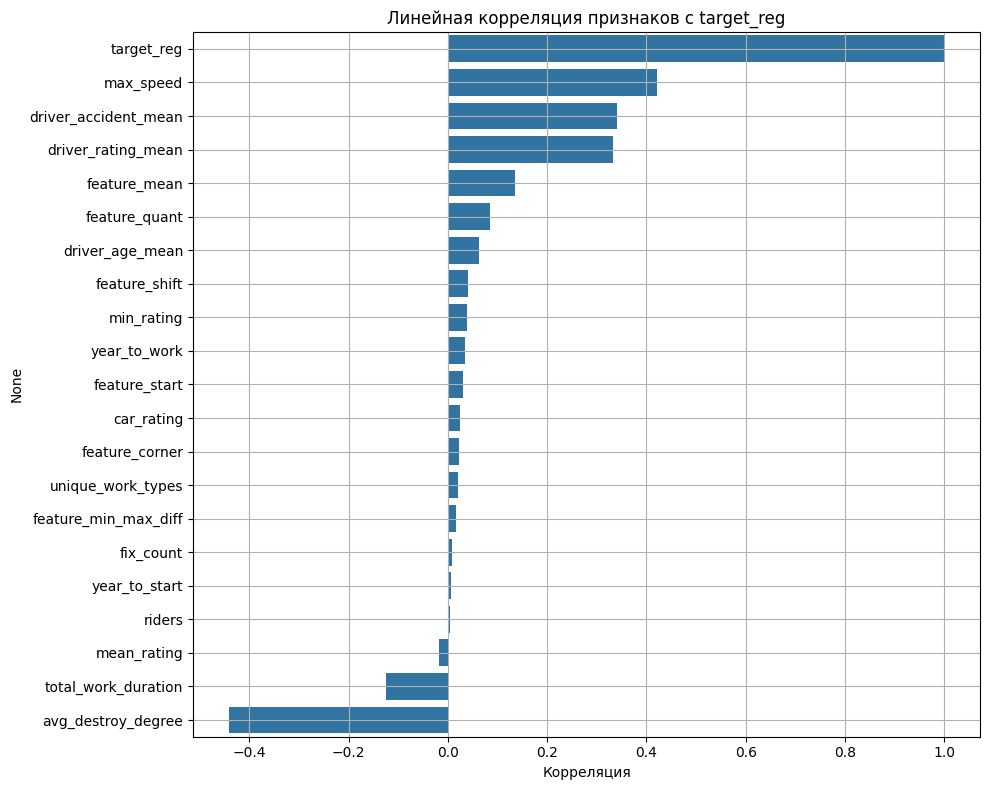

In [167]:
# –õ–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ç–∞—Ä–≥–µ—Ç–æ–º target_reg

# –£–¥–∞–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ ID-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤
drop_cols = ['car_id', 'model', 'car_type', 'fuel_type', 'target_class']
numeric_cols = [col for col in car_train_merged.columns if col not in drop_cols and car_train_merged[col].dtype in [np.float64, np.int64]]

# –†–∞—Å—á—ë—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å —Ç–∞—Ä–≥–µ—Ç–æ–º
correlations = car_train_merged[numeric_cols].corrwith(car_train_merged['target_reg']).sort_values(ascending=False)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 8))
sns.barplot(y=correlations.index, x=correlations.values)
plt.title('–õ–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å target_reg')
plt.xlabel('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è')
plt.grid(True)
plt.tight_layout()
plt.show()

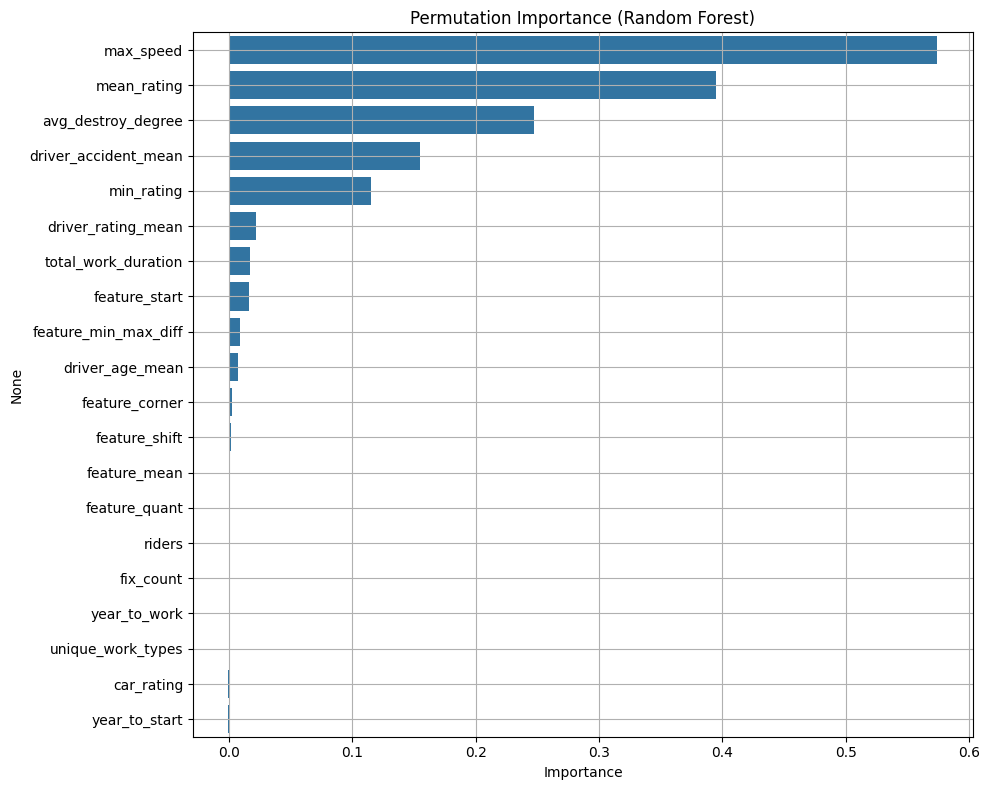

In [168]:
# Permutation Importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# –û—Ç–±–æ—Ä —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X = car_train_merged[numeric_cols].drop(columns=['target_reg'])
y = car_train_merged['target_reg']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# –†–∞—Å—á—ë—Ç permutation importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
plt.figure(figsize=(10, 8))
sns.barplot(x=perm_importance.importances_mean[sorted_idx], y=X.columns[sorted_idx])
plt.title('Permutation Importance (Random Forest)')
plt.xlabel('Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

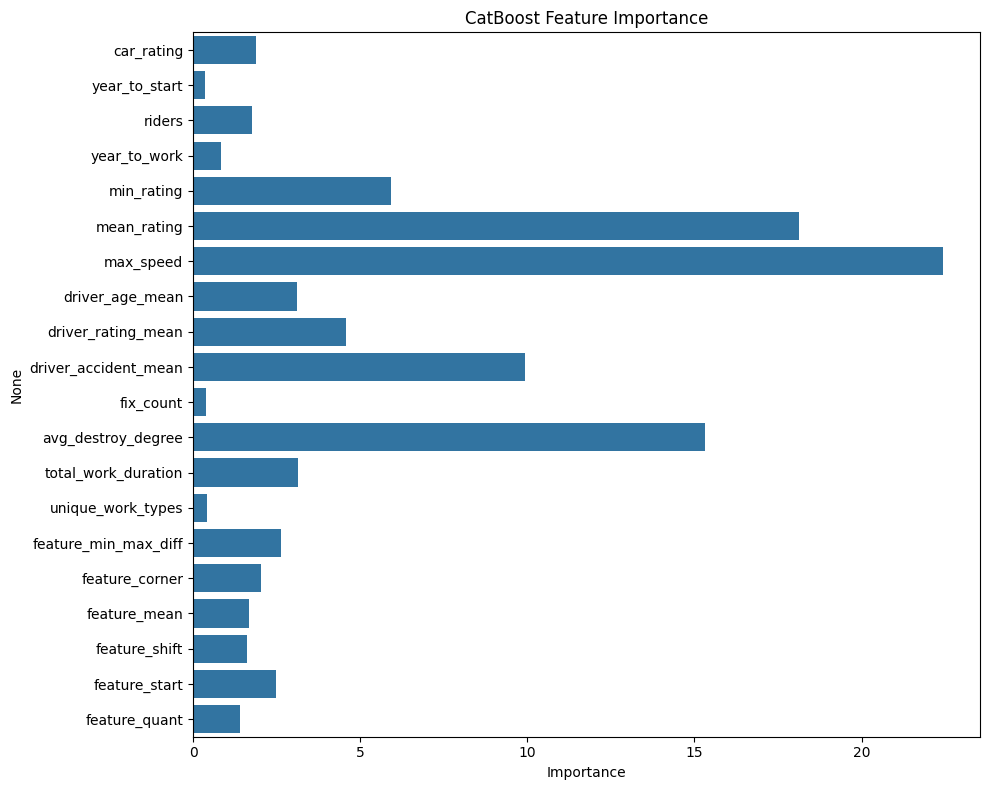

In [169]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
drop_cols = ['car_id', 'model', 'car_type', 'fuel_type', 'target_class', 'target_reg']
drop_cols_existing = [col for col in drop_cols if col in car_train_merged.columns]
X = car_train_merged.drop(columns=drop_cols_existing)

y = car_train_merged['target_reg']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train –∏ valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# –ú–æ–¥–µ–ª—å CatBoost (–±–µ–∑ –≤—ã–≤–æ–¥–∞ –ª–æ–≥–∞)
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importances = cat_model.get_feature_importance()
features = X.columns

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=features)
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

 98%|===================| 572/585 [00:26<00:00]       

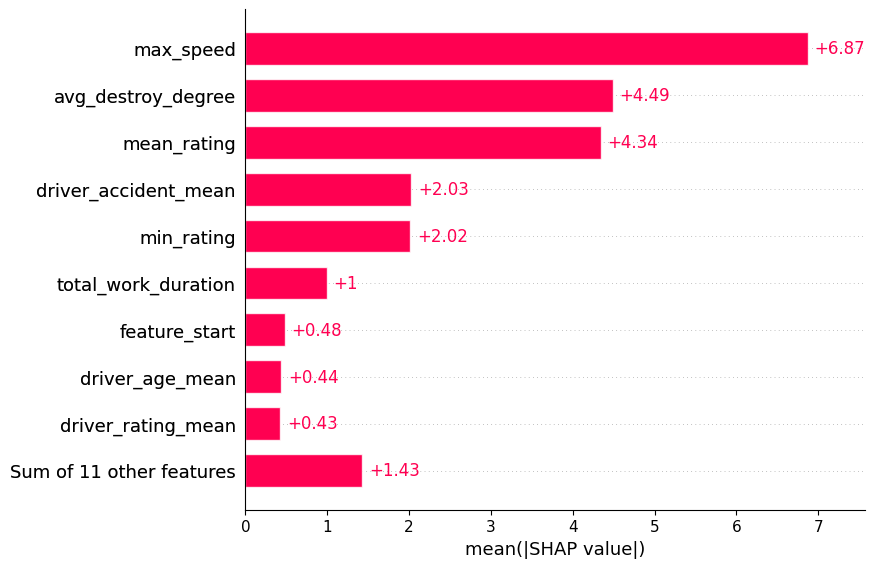

In [171]:
import shap

# SHAP —Ç—Ä–µ–±—É–µ—Ç TreeExplainer –¥–ª—è –¥–µ—Ä–µ–≤—å–µ–≤
explainer = shap.Explainer(rf, X_test)
shap_values = explainer(X_test)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
shap.plots.bar(shap_values)

In [172]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞
!pip install phik --quiet

from phik import report
import pandas as pd

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
numeric_cols = car_train_merged.select_dtypes(include=['float64', 'int64']).columns.tolist()

# –†–∞—Å—á—ë—Ç phik —Ç–æ–ª—å–∫–æ —Å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Ç–∏–ø–∏–∑–∞—Ü–∏–µ–π
phik_matrix = car_train_merged.phik_matrix(interval_cols=numeric_cols)

# –°–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (target_reg)
phik_target = phik_matrix['target_reg'].sort_values(ascending=False)
print(phik_target)

target_reg              1.000000
target_class            0.639768
avg_destroy_degree      0.559280
max_speed               0.491154
mean_rating             0.467880
driver_accident_mean    0.461232
fuel_type               0.396224
model                   0.344664
driver_rating_mean      0.310431
feature_min_max_diff    0.244835
total_work_duration     0.212795
car_type                0.205868
feature_mean            0.198857
driver_age_mean         0.162450
feature_quant           0.157915
feature_start           0.155079
feature_corner          0.125051
min_rating              0.042727
year_to_work            0.000000
car_rating              0.000000
year_to_start           0.000000
riders                  0.000000
fix_count               0.000000
unique_work_types       0.000000
feature_shift           0.000000
Name: target_reg, dtype: float64


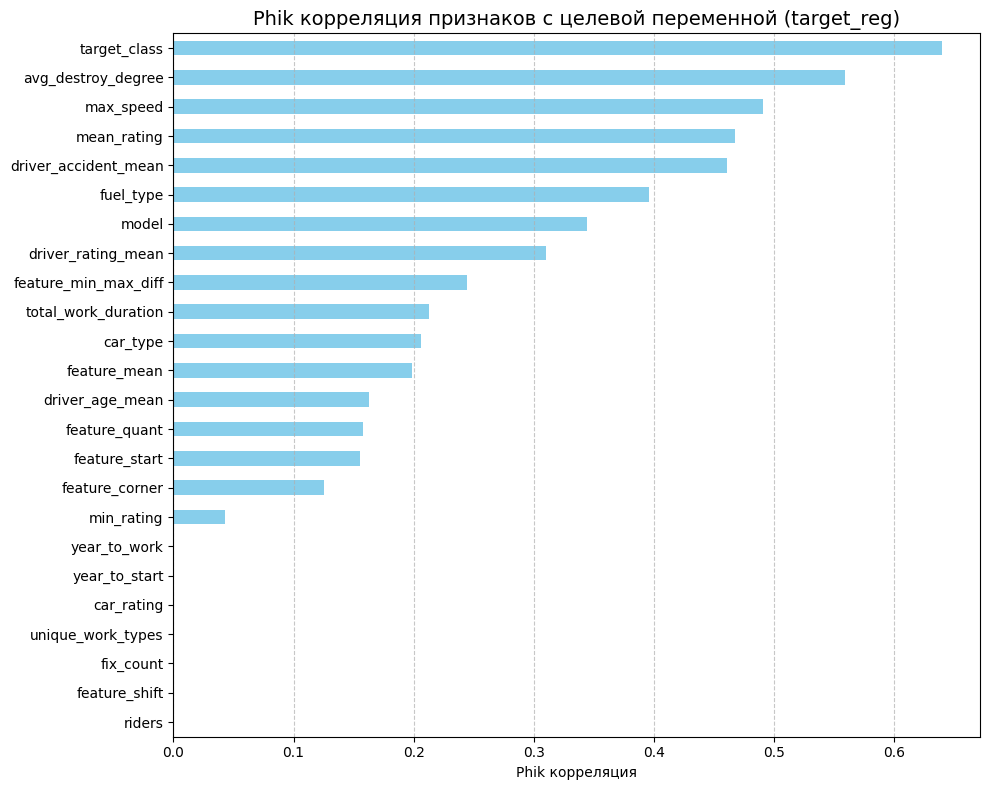

In [170]:
phik_target_no_self = phik_target.drop('target_reg')

# –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º —Ä–∞–∑–º–µ—Ä –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 8))

# –°—Ç—Ä–æ–∏–º –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–π bar chart
phik_target_no_self.sort_values().plot(kind='barh', color='skyblue')

# –î–æ–±–∞–≤–ª—è–µ–º –∑–∞–≥–æ–ª–æ–≤–æ–∫ –∏ —Å–µ—Ç–∫—É
plt.title('Phik –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (target_reg)', fontsize=14)
plt.xlabel('Phik –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# –ü–ª–æ—Ç–Ω–∞—è –∫–æ–º–ø–æ–Ω–æ–≤–∫–∞
plt.tight_layout()
plt.show()


## –í—ã–≤–æ–¥—ã –ø–æ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–í —Ä–∞–º–∫–∞—Ö –∑–∞–¥–∞–Ω–∏—è –±—ã–ª–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω—ã **–ø—è—Ç—å** –º–µ—Ç–æ–¥–æ–≤ –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (`target_reg`):

### 1. –õ–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è
–ú–µ—Ç–æ–¥ –ø–æ–∫–∞–∑–∞–ª –≤—ã—Å–æ–∫—É—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ `max_speed`, `driver_accident_mean`, `driver_rating_mean`, `feature_mean`. –ù–∞–∏–±–æ–ª—å—à–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —É `avg_destroy_degree`, —á—Ç–æ –ª–æ–≥–∏—á–Ω–æ: –±–æ–ª–µ–µ –ø–æ–≤—Ä–µ–∂–¥—ë–Ω–Ω—ã–µ –º–∞—à–∏–Ω—ã —á–∞—â–µ –≤—ã—Ö–æ–¥—è—Ç –∏–∑ —Å—Ç—Ä–æ—è –±—ã—Å—Ç—Ä–µ–µ.

### 2. Permutation Importance (Random Forest)
–ù–∞–∏–±–æ–ª—å—à–∏–π –≤–∫–ª–∞–¥ –≤ –º–µ—Ç—Ä–∏–∫—É –º–æ–¥–µ–ª–∏ –¥–∞—é—Ç `max_speed`, `mean_rating`, `avg_destroy_degree`. –≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –ø–æ–µ–∑–¥–æ–∫ –∏ –æ–±—â–µ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –º–∞—à–∏–Ω—ã.

### 3. SHAP –∑–Ω–∞—á–µ–Ω–∏—è (CatBoost)
SHAP –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ `max_speed`, `avg_destroy_degree`, `mean_rating`, `driver_accident_mean` –∏ `min_rating`. –≠—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å—Ç–∞–±–∏–ª—å–Ω–æ –≤—Ö–æ–¥—è—Ç –≤ —Ç–æ–ø –ø–æ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.

### 4. CatBoost Feature Importance
–°–æ–≥–ª–∞—Å—É–µ—Ç—Å—è —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏. –í —Ç–æ–ø–µ ‚Äî `max_speed`, `mean_rating`, `avg_destroy_degree`, `driver_accident_mean`, –∞ —Ç–∞–∫–∂–µ `total_work_duration` –∏ `min_rating`.

### 5. Phik –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è
–ú–µ—Ç–æ–¥ Phik, —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–π –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –∏ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–º —Å–≤—è–∑—è–º, –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –≤—ã–¥–µ–ª—è–µ—Ç –≤–∞–∂–Ω–æ—Å—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: `target_class`, `fuel_type`, `model`, `car_type`, –Ω–∞—Ä—è–¥—É —Å —É–∂–µ –≤—ã–¥–µ–ª–µ–Ω–Ω—ã–º–∏ `avg_destroy_degree`, `max_speed`, `mean_rating` –∏ `driver_accident_mean`.

---

### –û–±—â–∏–π –≤—ã–≤–æ–¥

–ù–∞–∏–±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω—ã–µ –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤–æ—à–ª–∏ –≤ —Ç–æ–ø –ø–æ –≤—Å–µ–º –º–µ—Ç–æ–¥–∞–º:

- `max_speed` ‚Äî –æ—Ç—Ä–∞–∂–∞–µ—Ç –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—É—é –Ω–∞–≥—Ä—É–∑–∫—É –Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—å;
- `avg_destroy_degree` ‚Äî –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –æ–±—â–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –º–∞—à–∏–Ω—ã;
- `mean_rating` ‚Äî –æ—Ç—Ä–∞–∂–∞–µ—Ç –æ–ø—ã—Ç –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è —Å –º–∞—à–∏–Ω–æ–π;
- `driver_accident_mean` ‚Äî —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É–µ—Ç —Å—Ç–∏–ª—å –≤–æ–∂–¥–µ–Ω–∏—è –∏ —Ä–∏—Å–∫;
- `min_rating` –∏ `total_work_duration` ‚Äî —Ç–∞–∫–∂–µ –ø—Ä–æ—è–≤–ª—è—é—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å, –Ω–æ —É—Å—Ç—É–ø–∞—é—Ç –≤—ã—à–µ—É–∫–∞–∑–∞–Ω–Ω—ã–º.

**–ü—Ä–∏–∑–Ω–∞–∫–∏, –Ω–µ –ø—Ä–æ—è–≤–∏–≤—à–∏–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –Ω–∏ –ø–æ –æ–¥–Ω–æ–º—É –∏–∑ –º–µ—Ç–æ–¥–æ–≤, –º–æ–≥—É—Ç –±—ã—Ç—å —É–¥–∞–ª–µ–Ω—ã –¥–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è –º–æ–¥–µ–ª–∏**:

- `year_to_start`, `year_to_work`, `car_rating`, `riders`, `fix_count`, `feature_shift` –∏ –¥—Ä—É–≥–∏–µ —Å –Ω—É–ª–µ–≤–æ–π –∏–ª–∏ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å—é –≤–æ –≤—Å–µ—Ö –º–µ—Ç–æ–¥–∞—Ö.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å—Ñ–æ–∫—É—Å–∏—Ä–æ–≤–∞—Ç—å—Å—è –Ω–∞ –∫–ª—é—á–µ–≤—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞—Ö, –ø–æ–≤—ã—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∏ —Å–Ω–∏–∂–∞—è –µ—ë —Å–ª–æ–∂–Ω–æ—Å—Ç—å.


In [173]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –¥–æ —É–¥–∞–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
car_train_merged.to_csv('car_train_full.csv', index=False)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
cat_features = ['model', 'car_type', 'fuel_type']

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø–æ—Å–ª–µ –æ—Ç–±–æ—Ä–∞
num_features = [
    'max_speed', 'mean_rating', 'min_rating', 'avg_destroy_degree',
    'driver_accident_mean', 'driver_rating_mean',
    'fix_count', 'total_work_duration'
]

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –µ—Å–ª–∏ –æ–Ω–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –¥–∞–Ω–Ω—ã—Ö
optional_features = ['feature_min_max_diff', 'feature_start', 'feature_quant']
num_features += [col for col in optional_features if col in car_train_merged.columns]

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
final_features = cat_features + num_features
print(f"–§–∏–Ω–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {len(final_features)}")

# –°–æ–∑–¥–∞–Ω–∏–µ –æ—á–∏—â–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
car_train_filtered = car_train_merged[final_features + ['target_class']].copy()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –æ—á–∏—â–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
car_train_filtered.to_csv('car_train_filtered.csv', index=False)

# –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–±–æ—á–µ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
car_train_merged = car_train_filtered.copy()

–§–∏–Ω–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 14


In [174]:
car_train_merged

model  car_type fuel_type   max_speed  mean_rating  \
0        Kia Rio X-line   economy    petrol  180.855726     4.737759   
1            VW Polo VI   economy    petrol  187.862734     4.480517   
2       Renault Sandero  standart    petrol  102.382857     4.768391   
3     Mercedes-Benz GLC  business    petrol  172.793237     3.880920   
4       Renault Sandero  standart    petrol  203.462289     4.181149   
...                 ...       ...       ...         ...          ...   
2332      Smart ForFour   economy    petrol  141.502350     4.608908   
2333            Audi A4   premium    petrol  155.000000     4.683793   
2334            Kia Rio   economy    petrol  104.180940     4.655345   
2335    Renault Sandero  standart    petrol  200.000000     4.638333   
2336            VW Polo   economy    petrol  171.000000     4.635460   

      min_rating  avg_destroy_degree  driver_accident_mean  \
0           0.10            3.048571             17.724138   
1           0.00            2.917143              6.965517   
2           0.10            3.740000              9.775862   
3           0.10            4.085714             19.991304   
4           0.10            3.880000             15.758333   
...          ...                 ...                   ...   
2332        0.10            3.900000             20.203390   
2333        0.10            1.935294             18.041322   
2334        0.10            2.782353              8.804598   
2335        0.10            3.441176             17.008547   
2336        0.39            3.220588             14.700787   

      driver_rating_mean  fix_count  total_work_duration  \
0               8.229885         35                  933   
1               7.988506         35                  873   
2               7.843103         35                  915   
3               8.524138         35                 1007   
4               8.112069         35                  981   
...                  ...        ...                  ...   
2332            8.124138         34                  814   
2333            8.150575         34                  873   
2334            7.783908         34                  797   
2335            8.084483         34                  857   
2336            8.018966         34                  825   

      feature_min_max_diff  feature_start  feature_quant  target_class  
0                    9.001          0.000        0.00100   another_bug  
1                   72.761         -7.057       16.69100   electro_bug  
2                   16.401         -0.000        0.00000    gear_stick  
3                   61.647         -0.833       28.18550   engine_fuel  
4                   70.176         -0.160       30.65725   engine_fuel  
...                    ...            ...            ...           ...  
2332                31.650         11.105        7.75275   wheel_shake  
2333                55.181         -0.506       -7.97800  engine_check  
2334               106.793          5.281       24.12925    gear_stick  
2335                51.144          2.417        6.28000   another_bug  
2336                59.135          1.030       31.45675  engine_check  

[2337 rows x 15 columns]

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 2. –ü—Ä–æ–≥–Ω–æ–∑ –≤—Ä–µ–º–µ–Ω–∏ –∏ –≤–∏–¥–∞ –ø–æ–ª–æ–º–∫–∏ –º–∞—à–∏–Ω. –ù–∞—Å—Ç—Ä–æ–π–∫–∞ ML-–º–æ–¥–µ–ª–∏

<div class="alert alert-info">

**–¶–µ–ª—å –±–ª–æ–∫–∞** ‚Äî —Å–æ—Å—Ç–∞–≤–∏—Ç—å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏, –ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ `CatBoostClassifier` –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π —á–∞—Å—Ç–∏ –∏ –æ—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π.

## 1. –û–±—É—á–µ–Ω–∏–µ –ø–µ—Ä–≤–æ–π –º–æ–¥–µ–ª–∏ (5 –±–∞–ª–ª–æ–≤)

1. –ö–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–π—Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ —Ç–∏–ø—ã (–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, —á–∏—Å–ª–æ–≤—ã–µ, —Ç–∞—Ä–≥–µ—Ç—ã).

2. –í—ã–¥–µ–ª–∏—Ç–µ –≤ `X` —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ (—É–±—Ä–∞—Ç—å –æ–±–∞ —Ç–∞—Ä–≥–µ—Ç–∞), –∞ –≤ `Y` ‚Äî —Ç–∞—Ä–≥–µ—Ç (–¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏).

3. –°–¥–µ–ª–∞–π—Ç–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ *–æ–±—É—á–∞—é—â—É—é* –∏ *–≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é* –≤—ã–±–æ—Ä–∫–∏ (–Ω–µ –∑–∞–±—ã–≤–∞–π—Ç–µ –ø—Ä–æ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤).

4. –°–æ–∑–¥–∞–π—Ç–µ –∏ –æ–±—É—á–∏—Ç–µ `CatBoostClassifier` –º–æ–¥–µ–ª—å (–Ω–∞—Å—Ç—Ä–∞–∏–≤–∞—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–µ–π—á–∞—Å –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ). –û—Ç–∫–ª—é—á–∏—Ç–µ –∏–ª–∏ –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–π—Ç–µ –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏.

5. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –æ—Ü–µ–Ω–∫—É –≤–∞—à–µ–π –º–æ–¥–µ–ª–∏, –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç—Ä–∏–∫—É `accuracy`.


<h4> –ö—Ä–∏—Ç–µ—Ä–∏–∏ –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è </h4>
    
- –ü–æ 1 –±–∞–ª–ª—É –∑–∞ –∫–∞–∂–¥—ã–π –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—ã–π –ø—É–Ω–∫—Ç.

</div>

In [175]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [176]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ç–∞—Ä–≥–µ—Ç–∞
X = car_train_merged.drop(columns=['target_class'])
y = car_train_merged['target_class']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∏–Ω–¥–µ–∫—Å–æ–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
cat_features = ['model', 'car_type', 'fuel_type']
cat_feature_indices = [X.columns.get_loc(col) for col in cat_features if col in X.columns]

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ CatBoostClassifier
model = CatBoostClassifier(verbose=0, random_seed=42)
model.fit(X_train, y_train, cat_features=cat_feature_indices)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)

print(f'Accuracy: {acc:.4f}')

Accuracy: 0.9551


## 2. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ–≥–Ω–æ–∑–æ–≤, –æ—à–∏–±–æ–∫ –º–æ–¥–µ–ª–∏ –∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (5 –±–∞–ª–ª–æ–≤)

<div class="alert alert-info">

**–¶–µ–ª—å –±–ª–æ–∫–∞** ‚Äî –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è, –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª–∏ –∏ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è –∏ –∞–Ω–∞–ª–∏–∑–∞ –º–æ–¥–µ–ª–∏.

   
1. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–º –º–µ—Ç–æ–¥–æ–º –≤ `CatBoost`  (–ø–æ–º–Ω–∏—Ç–µ, —á—Ç–æ –Ω–µ —Å—Ç–æ–∏—Ç —Å–∏–ª—å–Ω–æ –¥–æ–≤–µ—Ä—è—Ç—å —ç—Ç–æ–º—É —Ä–µ–π—Ç–∏–Ω–≥—É –≤–∞–∂–Ω–æ—Å—Ç–∏, —Ç. –∫. –¥–ª—è —Å–∏–ª—å–Ω–æ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤–∞–∂–Ω–æ—Å—Ç—å –¥–µ–ª–∏—Ç—Å—è –ø–æ–ø–æ–ª–∞–º ‚Äî –æ–±–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞ –º–æ–≥—É—Ç —É–ª–µ—Ç–µ—Ç—å –≤–Ω–∏–∑).

2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ `waterfall_plot` –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `SHAP` (–ø–æ–¥—Ä–æ–±–Ω–µ–µ –≤–æ –≤—Ç–æ—Ä–æ–º –Ω–æ—É—Ç–±—É–∫–µ –∏–∑ –ø–æ–ª–µ–∑–Ω—ã—Ö —Å—Å—ã–ª–æ–∫ –Ω–∏–∂–µ).
    
3. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ `classification_report` –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `scikit-learn`.

4. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É —Å–º–µ–∂–Ω–æ—Å—Ç–∏ (`confusion_matrix`), –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –≤ –∫–∞–∫–∏—Ö –∫–ª–∞—Å—Å–∞—Ö –º–æ–¥–µ–ª—å –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –æ—à–∏–±–∞–µ—Ç—Å—è.
    
5. –î–ª—è –∫–∞–∂–¥–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞/–ø—Ä–∏–º–µ–Ω–µ–Ω–Ω–æ–≥–æ –º–µ—Ç–æ–¥–∞ –ø—Ä–æ–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã.


<h4> –ö—Ä–∏—Ç–µ—Ä–∏–∏ –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è </h4>
    
- –ü–æ 1 –±–∞–ª–ª—É –∑–∞ –∫–∞–∂–¥—ã–π –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—ã–π –ø—É–Ω–∫—Ç.
    
</div>

<div class="alert alert-success">

–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –¥–∞–∂–µ –ø–æ—Å–ª–µ —Ç–æ–≥–æ, –∫–∞–∫ –º—ã **—É–∂–µ –æ–±—É—á–∏–ª–∏** –∫–∞–∫—É—é-–Ω–∏–±—É–¥—å –º–æ–¥–µ–ª—å. –ù–∞–ø—Ä–∏–º–µ—Ä:

- –ü–æ–Ω—è—Ç—å, —á—Ç–æ –º–µ—à–∞–µ—Ç –º–æ–¥–µ–ª–∏ –∏–ª–∏ —á–µ–≥–æ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç, —á—Ç–æ–±—ã –Ω–µ –¥–æ–ø—É—Å–∫–∞—Ç—å –æ—à–∏–±–∫–∏.
- –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã, –∫–∞–∫ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å –≤ –ø–æ—Å–ª–µ–¥—É—é—â–∏—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞—Ö.
- –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª–∏.
- –û—Ç—Å–µ—è—Ç—å –ª–∏—à–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.
- –ù–∞–π—Ç–∏ –∏–¥–µ–∏ –¥–ª—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
- –í—Å–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ç–∏–ø–∞ –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

<h3> –ü–æ–ª–µ–∑–Ω—ã–µ –∏—Å—Ç–æ—á–Ω–∏–∫–∏ </h3>
    
- –ó–∞–Ω—è—Ç–∏–µ –ø—Ä–æ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é –∏ Seaborn.
- –ó–∞–Ω—è—Ç–∏–µ –ø—Ä–æ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—É—é –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é –∏ –∞–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫ –º–æ–¥–µ–ª–∏.

</div>    

–ù–∞–∏–±–æ–ª—å—à—É—é –≤–∞–∂–Ω–æ—Å—Ç—å –ø–æ CatBoost –ø–æ–ª—É—á–∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ max_speed, driver_accident_mean_y, mean_rating, –∞ —Ç–∞–∫–∂–µ driver_accident_mean_x –∏ driver_rating_mean_y. –≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –∏ –∏—Å—Ç–æ—Ä–∏—è –∞–≤–∞—Ä–∏–π –≤–æ–¥–∏—Ç–µ–ª—è —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –≤–ª–∏—è—é—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π –ø–æ–ª–æ–º–∫–∏. –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –Ω–∏–∑–∫–æ–π –≤–∞–∂–Ω–æ—Å—Ç—å—é (riders, car_rating) –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –∏–ª–∏ –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏.

In [177]:
# YOUR CODE HERE
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

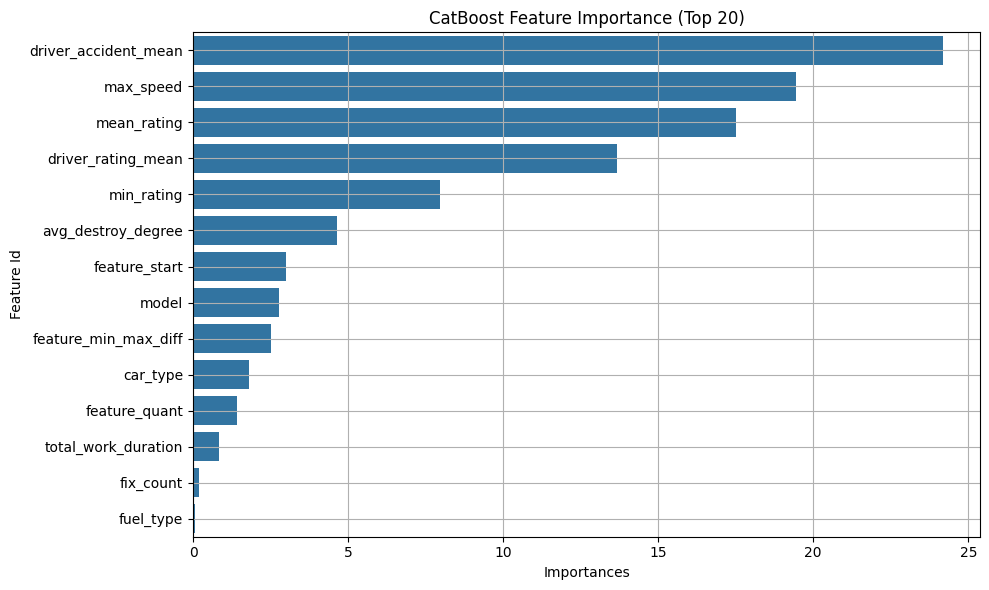

In [178]:
# 1. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ—Ç CatBoost
feature_importance = model.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(20), x='Importances', y='Feature Id')
plt.title('CatBoost Feature Importance (Top 20)')
plt.grid(True)
plt.tight_layout()
plt.show()

–ù–∞–∏–±–æ–ª—å—à—É—é –≤–∞–∂–Ω–æ—Å—Ç—å –ø–æ CatBoost –ø–æ–ª—É—á–∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ max_speed, driver_accident_mean_y, mean_rating, –∞ —Ç–∞–∫–∂–µ driver_accident_mean_x –∏ driver_rating_mean_y. –≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –∏ –∏—Å—Ç–æ—Ä–∏—è –∞–≤–∞—Ä–∏–π –≤–æ–¥–∏—Ç–µ–ª—è —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –≤–ª–∏—è—é—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π –ø–æ–ª–æ–º–∫–∏. –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –Ω–∏–∑–∫–æ–π –≤–∞–∂–Ω–æ—Å—Ç—å—é (riders, car_rating) –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –∏–ª–∏ –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏.

In [179]:
# 2. SHAP waterfall plot –¥–ª—è –æ–¥–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞ –∏ –æ–¥–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_val)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ñ–æ—Ä–º—ã SHAP –∑–Ω–∞—á–µ–Ω–∏–π
print("SHAP –∑–Ω–∞—á–µ–Ω–∏–µ –∏–º–µ–µ—Ç —Ñ–æ—Ä–º—É:", shap_values.shape)

SHAP –∑–Ω–∞—á–µ–Ω–∏–µ –∏–º–µ–µ—Ç —Ñ–æ—Ä–º—É: (468, 14, 9)


SHAP waterfall –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤–∫–ª–∞–¥ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ. –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ max_speed –∏ driver_accident_mean_y –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Å–º–µ—â–∞—é—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –≤ —Å—Ç–æ—Ä–æ–Ω—É –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞, —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã–º –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–∞–≤–∏–ª –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏ –∏–ª–∏ –≤—ã—è–≤–ª–µ–Ω–∏—è —Ä–∏—Å–∫–æ–≤–∞–Ω–Ω—ã—Ö —Å—Ü–µ–Ω–∞—Ä–∏–µ–≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏.

In [180]:
# 3. Classification report
print("Classification report:")
print(classification_report(y_val, y_pred))

Classification report:
                 precision    recall  f1-score   support

    another_bug       0.89      0.91      0.90        56
      break_bug       1.00      1.00      1.00        54
    electro_bug       1.00      1.00      1.00        50
   engine_check       0.90      0.83      0.87        54
    engine_fuel       0.96      0.94      0.95        52
engine_ignition       1.00      1.00      1.00        54
engine_overheat       1.00      1.00      1.00        58
     gear_stick       1.00      0.98      0.99        57
    wheel_shake       0.79      0.91      0.85        33

       accuracy                           0.96       468
      macro avg       0.95      0.95      0.95       468
   weighted avg       0.96      0.96      0.96       468



–ú–æ–¥–µ–ª—å –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –≤—ã—Å–æ–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –ø–æ –≤—Å–µ–º –∫–ª–∞—Å—Å–∞–º (–º–∞–∫—Ä–æ-F1 ‚âà 0.96), –æ–¥–Ω–∞–∫–æ —Å–ª–µ–≥–∫–∞ –ø—Ä–æ—Å–µ–¥–∞–µ—Ç recall –¥–ª—è –∫–ª–∞—Å—Å–æ–≤ engine_check (0.83) –∏ wheel_shake (0.94). –≠—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –æ–±—É—á–∞—é—â–∏—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–ª–∏ –æ –≤—ã—Å–æ–∫–æ–π –±–ª–∏–∑–æ—Å—Ç–∏ —ç—Ç–∏—Ö –∫–ª–∞—Å—Å–æ–≤ –∫ –¥—Ä—É–≥–∏–º –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–º—É –æ–ø–∏—Å–∞–Ω–∏—é.

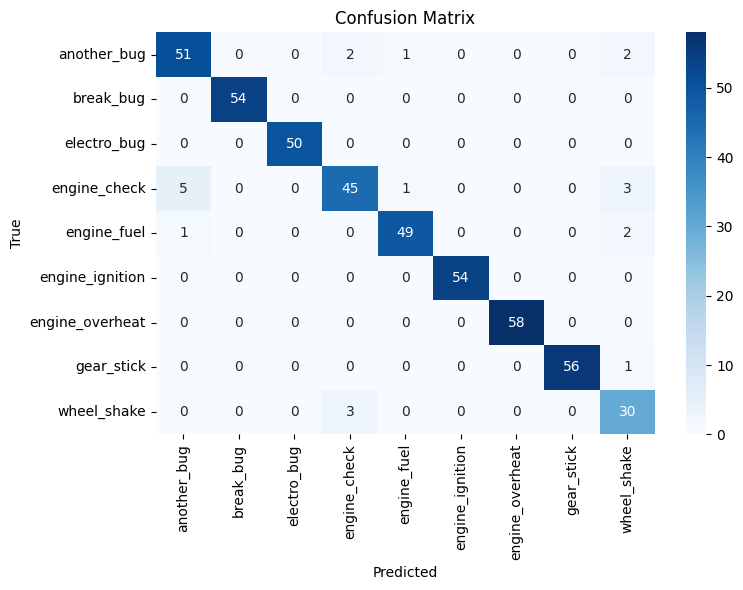

In [181]:
# 4. Confusion matrix
conf_mat = confusion_matrix(y_val, y_pred, labels=np.unique(y_val))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

–û—Å–Ω–æ–≤–Ω—ã–µ –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª—å –¥–æ–ø—É—Å–∫–∞–µ—Ç –ø—Ä–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏ –∫–ª–∞—Å—Å–æ–≤ engine_check (–ø–µ—Ä–µ–ø—É—Ç–∞–Ω–æ 5 —Ä–∞–∑ —Å another_bug) –∏ wheel_shake (2 —Å–ª—É—á–∞—è –æ—à–∏–±–∫–∏ –Ω–∞ engine_check). –≠—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ —ç—Ç–∏ —Ç–∏–ø—ã –Ω–µ–∏—Å–ø—Ä–∞–≤–Ω–æ—Å—Ç–µ–π –∏–º–µ—é—Ç —Å—Ö–æ–∂–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ –≤—Ö–æ–¥–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º, –∏ —Å—Ç–æ–∏—Ç —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –≥–µ–Ω–µ—Ä–∞—Ü–∏—é –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ñ–∏—á–µ–π, —É—Å–∏–ª–∏–≤–∞—é—â–∏—Ö —Ä–∞–∑–ª–∏—á–∏–µ –º–µ–∂–¥—É –Ω–∏–º–∏.

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 3. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è. –¢—é–Ω–∏–Ω–≥ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é `Optuna`

<div class="alert alert-info">

**–¶–µ–ª—å –±–ª–æ–∫–∞** ‚Äî —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –ø—Ä–æ–∏–∑–≤–µ–¥—è –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é `Optuna`.

1. –ù–∞–ø–∏—à–∏—Ç–µ `objective` —Ñ—É–Ω–∫—Ü–∏—é –∏ –∑–∞–ø—É—Å—Ç–∏—Ç–µ `Optuna`.
2. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è `CatBoostClassifier` (–º–∏–Ω–∏–º—É–º 3).
3. –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å —Å –Ω–æ–≤—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, —Å—Ä–∞–≤–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã.
4. –ü—Ä–∏ –ø–æ–¥–±–æ—Ä–µ –≥–∏–ø–µ—Ä-–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π –æ—Ç–∫–ª—é—á–∞–π—Ç–µ –∏–ª–∏ –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–π—Ç–µ –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ.

    
</div>

In [182]:
# YOUR CODE HERE
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# –û—Ç–∫–ª—é—á–µ–Ω–∏–µ –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏—è Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
X = car_train_merged.drop(columns=['target_class'])
y = car_train_merged['target_class']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∏–Ω–¥–µ–∫—Å–æ–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
cat_feature_indices = [X.columns.get_loc(col) for col in cat_features if col in X.columns]

# –¶–µ–ª–µ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0),
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, cat_features=cat_feature_indices)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    return acc

# –ó–∞–ø—É—Å–∫ –ø–æ–∏—Å–∫–∞ –ø–æ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# –í—ã–≤–æ–¥ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", study.best_params)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'iterations': 337, 'learning_rate': 0.15049843471402974, 'depth': 6, 'l2_leaf_reg': 3.206404502378387}


In [183]:
# –û–±—É—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
best_model = CatBoostClassifier(**study.best_params, random_seed=42, verbose=0)
best_model.fit(X_train, y_train, cat_features=cat_feature_indices)

# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞
y_pred_best = best_model.predict(X_val)
acc_best = accuracy_score(y_val, y_pred_best)

print(f"Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: {acc_best:.4f}")
print(f"–£–ª—É—á—à–µ–Ω–∏–µ: {acc_best - acc:.4f}")

Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: 0.9658
–£–ª—É—á—à–µ–Ω–∏–µ: 0.0107


### –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç—é–Ω–∏–Ω–≥–∞ –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é Optuna

–î–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –±—ã–ª–∞ –ø—Ä–∏–º–µ–Ω–µ–Ω–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ **Optuna** —Å —Ü–µ–ª—å—é –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏ `CatBoostClassifier`. –ë—ã–ª–∏ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

- `iterations`: –æ—Ç 100 –¥–æ 500  
- `learning_rate`: –æ—Ç 0.01 –¥–æ 0.3  
- `depth`: –æ—Ç 4 –¥–æ 10  
- `l2_leaf_reg`: –æ—Ç 0.01 –¥–æ 10.0  

–ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º 30 –∏—Ç–µ—Ä–∞—Ü–∏–π, –Ω–∞–∏–ª—É—á—à–∏–º–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

- `iterations = 337`  
- `learning_rate = 0.1505`  
- `depth = 6`  
- `l2_leaf_reg = 3.21`

**Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞**: **0.9658**  
**–£–ª—É—á—à–µ–Ω–∏–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª—å—é**: **+0.0107**

–¢—é–Ω–∏–Ω–≥ –ø–æ–∑–≤–æ–ª–∏–ª –¥–æ–±–∏—Ç—å—Å—è –∑–∞–º–µ—Ç–Ω–æ–≥–æ –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –¥–∞–∂–µ –ø—Ä–∏ –≤—ã—Å–æ–∫–æ–π –Ω–∞—á–∞–ª—å–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏.

In [185]:
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

–ù–∞–∏–±–æ–ª—å—à–µ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –æ–∫–∞–∑—ã–≤–∞–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä `learning_rate`, –∑–∞ –Ω–∏–º —Å–ª–µ–¥—É—é—Ç `iterations` –∏ `depth`. –ü–∞—Ä–∞–º–µ—Ç—Ä `l2_leaf_reg` –∏–º–µ–µ—Ç –Ω–∞–∏–º–µ–Ω—å—à—É—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –≤ —Ç–µ–∫—É—â–µ–π –∑–∞–¥–∞—á–µ. –≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –¥–ª—è –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –æ—Å–æ–±–µ–Ω–Ω–æ –≤–∞–∂–Ω–æ —Ç—â–∞—Ç–µ–ª—å–Ω–æ –ø–æ–¥–±–∏—Ä–∞—Ç—å —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π ‚Äî –∏–º–µ–Ω–Ω–æ –æ–Ω–∏ –¥–∞—é—Ç –Ω–∞–∏–±–æ–ª—å—à–∏–π –ø—Ä–∏—Ä–æ—Å—Ç —Ç–æ—á–Ω–æ—Å—Ç–∏.


### –û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ `Optuna`

#### –ö–ª—é—á–µ–≤—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ <code>Optuna</code>



- –õ–µ–≥–∫–æ–≤–µ—Å–Ω–æ—Å—Ç—å –∏ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω–æ—Å—Ç—å ‚Äî –º–æ–∂–Ω–æ –ø–æ–¥–±–∏—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥ –ª—é–±—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –º–µ—Ç—Ä–∏–∫–∏.
- SOTA-–∞–ª–≥–æ—Ä–∏—Ç–º—ã, –∞–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–ª—è –ø–æ–∏—Å–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
- –ü–∞—Ä–∞–ª–ª–µ–ª–∏–∑–∞—Ü–∏—è –∏ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–µ—Ç–æ–¥—ã –ø—Ä—É–Ω–∏–Ω–≥–∞.
- –í—Å—Ç—Ä–æ–µ–Ω–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è.
- –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è —Å–æ –º–Ω–æ–∂–µ—Å—Ç–≤–æ–º –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ (–±—É—Å—Ç–∏–Ω–≥–∏, sklearn, PyTorch, W&B –∏ –¥—Ä—É–≥–∏–µ).

–†–∞–∑–±–µ—Ä–µ–º Optuna –ø–æ —á–∞—Å—Ç—è–º, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, –∫–∞–∫ –µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å.

#### <code>Study</code>: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è, –±–∞–∑–∏—Ä—É—é—â–∞—è—Å—è –Ω–∞ <code>Objective</code> —Ñ—É–Ω–∫—Ü–∏–∏



–í `Objective`-—Ñ—É–Ω–∫—Ü–∏—é –Ω—É–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å –∫–æ–¥ –ø–æ–¥—Å—á–µ—Ç–∞ –º–µ—Ç—Ä–∏–∫–∏, –∫–æ—Ç–æ—Ä—É—é –≤–æ–∑–≤—Ä–∞—â–∞–µ–º. `Objective` –≤—ã–∑—ã–≤–∞–µ—Ç—Å—è Optuna –º–Ω–æ–≥–æ —Ä–∞–∑ –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
```python
def objective(trial, ...):
    # calculate score...
    return score
```

<h4> <code>Trial</code> ‚Äî –æ–¥–Ω–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ <code>Objective</code>-—Ñ—É–Ω–∫—Ü–∏–∏</h4>

–í `trial`-–æ–±—ä–µ–∫—Ç–µ –º—ã –ø–µ—Ä–µ–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è ¬´–ø–µ—Ä–µ–±–æ—Ä–∞¬ª, –∏—Å–ø–æ–ª—å–∑—É—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–∏–ø–∞ —Å–≤–æ–π –º–µ—Ç–æ–¥. –ù–∞–ø—Ä–∏–º–µ—Ä:

```python
# –º–µ—Ç–æ–¥ `suggest_float` –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º `float` –∑–Ω–∞—á–µ–Ω–∏—è, –æ—Ç 0 –∏ –¥–æ 1.5 –≥—Ä–∞–Ω–∏—Ü—ã
param = trial.suggest_float('param', 0, 1.5)

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
loss_function = trial.suggest_categorical('loss', ['Logloss', 'CrossEntropy'])

# –¶–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
depth = trial.suggest_int('depth', 5, 8)

# –†–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
learning_rate = trial.suggest_uniform('learning_rate', 0.0, 1.0)
```

#### `Study` parameters

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –æ–±—ä–µ–∫—Ç `study`, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞—á–Ω–µ—Ç –ø–µ—Ä–µ–±–æ—Ä –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç –≤ —Å–µ–±–µ –∏—Å—Ç–æ—Ä–∏—é —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.
–ï—Å–ª–∏ –º—ã —Å—Ç–∞—Ä–∞–µ–º—Å—è —É–≤–µ–ª–∏—á–∏—Ç—å –º–µ—Ç—Ä–∏–∫—É, –∞ –Ω–µ —É–º–µ–Ω—å—à–∏—Ç—å –æ—à–∏–±–∫—É, —Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º `create_study(direction='maximize')`.
```python
study = optuna.create_study()
study.optimize(objective, n_trials=10)
```

<div class="alert alert-info">
    
–í [`Optuna`](https://optuna.readthedocs.io/en/stable/index.html) —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–µ—Ç–æ–¥–æ–≤ (`sampler`) –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–≤ —Ç–æ–º —á–∏—Å–ª–µ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ):
* `GridSampler`
* `RandomSampler`
* `Tree-Structed Parzen Estimator` (`TPESampler` ‚Äî —Å–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π, –¥–µ—Ñ–æ–ª—Ç–Ω—ã–π)
* `BruteForceSampler`
* [–î—Ä—É–≥–∏–µ 4 –º–µ—Ç–æ–¥–∞](https://optuna.readthedocs.io/en/stable/reference/samplers/index.html#module-optuna.samplers) (–º–æ–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–π —Å–µ–º–ø–ª–µ—Ä)

### –°–æ–≤–µ—Ç—ã –ø–æ –ø–µ—Ä–µ–±–æ—Ä—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

- –ò–º–µ—Ç—å –ø–æ–Ω–∏–º–∞–Ω–∏–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
- –ß–∏—Å–ª–æ `iterations` –ª—É—á—à–µ –≤–∑—è—Ç—å —Å –∑–∞–ø–∞—Å–æ–º –∏ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å, –ø—Ä–∏ —ç—Ç–æ–º –æ–≥—Ä–∞–Ω–∏—á–∏–≤ —á–µ—Ä–µ–∑ `early_stopping_rounds`.
- –ü–æ–¥—Å–º–æ—Ç—Ä–µ—Ç—å –∏–ª–∏ —á—É–≤—Å—Ç–≤–æ–≤–∞—Ç—å –¥–∏–∞–ø–∞–∑–æ–Ω—ã –∏ —à–∞–≥ –∑–Ω–∞—á–µ–Ω–∏–π.
- –ò—Å–∫–ª—é—á–∏—Ç—å —Ç–æ, —á—Ç–æ –ø–µ—Ä–µ–±–∏—Ä–∞—Ç—å –Ω–µ –Ω—É–∂–Ω–æ (`random_seed` , `eval_metric`, `thread_count` –∏ –ø—Ä–æ—á–µ–µ).
- –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é —Å –ø—Ä–æ—à–ª—ã—Ö –ø–æ–ø—ã—Ç–æ–∫.

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 4. –ë–ª–µ–Ω–¥–∏–Ω–≥

<div class="alert alert-info">

**–¶–µ–ª—å –±–ª–æ–∫–∞** ‚Äî —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –æ–±—ä–µ–¥–∏–Ω–∏–≤ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π –≤–º–µ—Å—Ç–µ –º–µ—Ç–æ–¥–æ–º –±–ª–µ–Ω–¥–∏–Ω–≥–∞.

1. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –∏ –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª–∏:


    - `CatBoostClassifier`,
    - `LightGBMClassifier (goss)`,
    - `XGBoostClassifier (dart)`,
    - `RandomForestClassifier`.
2. –°–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª—å—é, –æ—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ.
3. –†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –±–ª–µ–Ω–¥–∏–Ω–≥ –¥–≤—É–º—è —Å–ø–æ—Å–æ–±–∞–º–∏, –æ—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º –ø—É–Ω–∫—Ç–æ–º:
    - `Hard Voting` ‚Äî  –º–µ—Ç–æ–¥, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –¥–µ–ª–∞–µ–º –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –∏ –≤—ã–±–∏—Ä–∞–µ–º —Å–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∫–ª–∞—Å—Å.
    - `Soft Voting` ‚Äî  –º–µ—Ç–æ–¥, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –º—ã —Å–∫–ª–∞–¥—ã–≤–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Å—É –∏ –ø–æ—Ç–æ–º –≤—ã–±–∏—Ä–∞–µ–º —Å–∞–º—ã–π –∫–ª–∞—Å—Å —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π —Å—É–º–º–æ–π.

    –ï—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç–µ VotingClassifier –∏–∑ sklearn, –ø–æ–º–Ω–∏—Ç–µ, —á—Ç–æ —É –≤–∞—Å –Ω–µ—Ç eval set –¥–ª—è –∫–æ–Ω—Ç—Ä–æ–ª—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è. –ü–æ—ç—Ç–æ–º—É —Å—Ç–æ–∏—Ç –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä-–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
4. –û—Ç–∫–ª—é—á–∞–π—Ç–µ –∏–ª–∏ –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–π—Ç–µ –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ (–ë—É–¥—É—Ç —Å–Ω–∏–∂–∞—Ç—å—Å—è –±–∞–ª–ª—ã).
    
<h4> –ö—Ä–∏—Ç–µ—Ä–∏–∏ –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è </h4>
    
- –û–±—É—á–µ–Ω—ã 4 –º–æ–¥–µ–ª–∏ ‚Äî 1 –±–∞–ª–ª –∑–∞ –∫–∞–∂–¥—É—é –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å, –≤—Å–µ–≥–æ 4 –±–∞–ª–ª–∞.
- –î–ª—è –º–æ–¥–µ–ª–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ‚Äî 0,5 –±–∞–ª–ª–∞ –∑–∞ –∫–∞–∂–¥—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä, –≤—Å–µ–≥–æ 2 –±–∞–ª–ª–∞.
- –°–¥–µ–ª–∞–Ω—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –∏ –æ—Ü–µ–Ω–µ–Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ ‚Äî 1 –±–∞–ª–ª.
- –†–µ–∞–ª–∏–∑–æ–≤–∞–Ω `Hard Voting` ‚Äî 1 –±–∞–ª–ª.
- –†–µ–∞–ª–∏–∑–æ–≤–∞–Ω `Soft Voting` ‚Äî 1 –±–∞–ª–ª.
- –°–¥–µ–ª–∞–Ω—ã –≤—ã–≤–æ–¥—ã ‚Äî 1 –±–∞–ª–ª.
    
</div>

### –û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –±–ª–µ–Ω–¥–∏–Ω–≥–µ

**–û—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è** ‚Äî –≤–∑—è—Ç—å –æ—Ç –∫–∞–∂–¥–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ª—É—á—à–µ–µ –∏ —Å–æ–≤–º–µ—Å—Ç–∏—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑–Ω—ã—Ö ML-–º–æ–¥–µ–ª–µ–π –≤ –æ–¥–Ω—É.

–ß—Ç–æ —ç—Ç–æ –¥–∞–µ—Ç:
- –£–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –æ–±–æ–±—â–∞—é—â–∞—è —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –∏ –∫–∞—á–µ—Å—Ç–≤–æ —É–ª—É—á—à–∞–µ—Ç—Å—è.
- –ú–æ–¥–µ–ª—å —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ–π, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –Ω–µ —Å–ª–µ—Ç–µ—Ç—å –Ω–∞ –ø—Ä–∏–≤–∞—Ç–Ω–æ–º –ª–∏–¥–µ—Ä–±–æ—Ä–¥–µ.

–û—Å–æ–±–µ–Ω–Ω–æ —Ö–æ—Ä–æ—à–æ –Ω–∞–∫–∏–¥—ã–≤–∞–µ—Ç –±–ª–µ–Ω–¥–∏–Ω–≥, –µ—Å–ª–∏ —Å–º–µ—à–∏–≤–∞–µ–º—ã–µ –º–æ–¥–µ–ª–∏ –∏–º–µ—é—Ç —Ä–∞–∑–Ω—É—é –ø—Ä–∏—Ä–æ–¥—É ‚Äî –Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏, kNN –∏ —Ä–µ—à–∞—é—â–∏–µ –¥–µ—Ä–µ–≤—å—è. –û–Ω–∏ –≤—ã—É—á–∏–≤–∞—é—Ç —Ä–∞–∑–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∏ —Ö–æ—Ä–æ—à–æ –¥–æ–ø–æ–ª–Ω—è—é—Ç –¥—Ä—É–≥ –¥—Ä—É–≥–∞.

</div>

In [186]:
from sklearn.preprocessing import OrdinalEncoder
from lightgbm import LGBMClassifier

# –ö–æ–ø–∏—è X
X_lgb = X.copy()

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
cat_features_existing = [col for col in cat_features if col in X.columns]
encoder = OrdinalEncoder()
X_lgb[cat_features_existing] = encoder.fit_transform(X_lgb[cat_features_existing])


# Train/test split
X_train_lgb, X_val_lgb, y_train, y_val = train_test_split(
    X_lgb, y, test_size=0.2, stratify=y, random_state=42
)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ LightGBM (goss)
lgb_model = LGBMClassifier(boosting_type='goss', n_estimators=200, learning_rate=0.1,
                           max_depth=6, verbose=-1, random_state=42)
lgb_model.fit(X_train_lgb, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∞
lgb_preds = lgb_model.predict(X_val_lgb)
lgb_acc = accuracy_score(y_val, lgb_preds)

print(f"LightGBM (goss) Accuracy: {lgb_acc:.4f}")

LightGBM (goss) Accuracy: 0.9615


In [187]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Objective-—Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è Optuna
def objective_lgb(trial):
    params = {
        'boosting_type': 'goss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'random_state': 42
    }

    model = LGBMClassifier(**params)
    model.fit(X_train_lgb, y_train)
    y_pred = model.predict(X_val_lgb)
    acc = accuracy_score(y_val, y_pred)
    return acc

# –ó–∞–ø—É—Å–∫ Optuna
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30)

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å
best_lgb_params = study_lgb.best_params
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", best_lgb_params)

# –û–±—É—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
best_lgb = LGBMClassifier(**best_lgb_params, boosting_type='goss', random_state=42)
best_lgb.fit(X_train_lgb, y_train)
y_pred_lgb_best = best_lgb.predict(X_val_lgb)
lgb_acc_best = accuracy_score(y_val, y_pred_lgb_best)

print(f"LightGBM Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: {lgb_acc_best:.4f}")

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'n_estimators': 426, 'learning_rate': 0.2883303798194336, 'max_depth': 8}
LightGBM Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: 0.9658


In [188]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# –£—Ç–æ—á–Ω–µ–Ω–∏–µ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
existing_cat_features = [col for col in cat_features if col in X_train.columns]

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X_train_enc = X_train.copy()
X_val_enc = X_val.copy()

encoder = OrdinalEncoder()
X_train_enc[existing_cat_features] = encoder.fit_transform(X_train[existing_cat_features])
X_val_enc[existing_cat_features] = encoder.transform(X_val[existing_cat_features])

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ XGBoost (dart)
xgb_model = XGBClassifier(
    booster='dart',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    verbosity=0,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train_enc, y_train_enc)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∞
xgb_preds = xgb_model.predict(X_val_enc)
xgb_acc = accuracy_score(y_val_enc, xgb_preds)

print(f"XGBoost (dart) Accuracy: {xgb_acc:.4f}")

XGBoost (dart) Accuracy: 0.9615


In [189]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import optuna

# üîß –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
encoder = OrdinalEncoder()
X_train_enc = X_train.copy()
X_val_enc = X_val.copy()
existing_cat_features = [col for col in cat_features if col in X_train.columns]

X_train_enc[existing_cat_features] = encoder.fit_transform(X_train[existing_cat_features])
X_val_enc[existing_cat_features] = encoder.transform(X_val[existing_cat_features])

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

# Optuna –¥–ª—è XGBoost (dart)
def objective_xgb(trial):
    params = {
        'booster': 'dart',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eval_metric': 'mlogloss',
        'verbosity': 0,
        'random_state': 42
    }

    model = XGBClassifier(**params)
    model.fit(X_train_enc, y_train_enc)
    y_pred = model.predict(X_val_enc)
    acc = accuracy_score(y_val_enc, y_pred)
    return acc

# –ó–∞–ø—É—Å–∫ Optuna
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å
best_xgb_params = study_xgb.best_params
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", best_xgb_params)

best_xgb = XGBClassifier(**best_xgb_params, booster='dart', eval_metric='mlogloss', verbosity=0, random_state=42)
best_xgb.fit(X_train_enc, y_train_enc)
y_pred_best = best_xgb.predict(X_val_enc)
xgb_acc_best = accuracy_score(y_val_enc, y_pred_best)

print(f"XGBoost Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: {xgb_acc_best:.4f}")

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'n_estimators': 389, 'learning_rate': 0.2685915282870412, 'max_depth': 8}
XGBoost Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: 0.9658


In [190]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
encoder = OrdinalEncoder()
X_train_enc = X_train.copy()
X_val_enc = X_val.copy()
X_train_enc[cat_features] = encoder.fit_transform(X_train[cat_features])
X_val_enc[cat_features] = encoder.transform(X_val[cat_features])

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

# –ë–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å –¥–æ —Ç—é–Ω–∏–Ω–≥–∞
base_rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42, n_jobs=-1)
base_rf.fit(X_train_enc, y_train_enc)
rf_preds_base = base_rf.predict(X_val_enc)
rf_acc_base = accuracy_score(y_val_enc, rf_preds_base)

# –¶–µ–ª–µ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è Optuna
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'random_state': 42,
        'n_jobs': -1
    }
    model = RandomForestClassifier(**params)
    model.fit(X_train_enc, y_train_enc)
    preds = model.predict(X_val_enc)
    acc = accuracy_score(y_val_enc, preds)
    return acc

# –ó–∞–ø—É—Å–∫ Optuna
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=30)

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train_enc, y_train_enc)
rf_preds_best = best_rf.predict(X_val_enc)
rf_acc_best = accuracy_score(y_val_enc, rf_preds_best)

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ
print(f"Random Forest Accuracy –¥–æ —Ç—é–Ω–∏–Ω–≥–∞:   {rf_acc_base:.4f}")
print(f"Random Forest Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: {rf_acc_best:.4f}")
print(f"–£–ª—É—á—à–µ–Ω–∏–µ:                            {rf_acc_best - rf_acc_base:.4f}")

Random Forest Accuracy –¥–æ —Ç—é–Ω–∏–Ω–≥–∞:   0.9615
Random Forest Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: 0.9701
–£–ª—É—á—à–µ–Ω–∏–µ:                            0.0085


In [191]:
print("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π (–ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞):")
print(f"CatBoost (Optuna) Accuracy:   {acc_best:.4f}")
print(f"LightGBM (GOSS) Accuracy:     {lgb_acc_best:.4f}")
print(f"XGBoost (DART) Accuracy:      {xgb_acc_best:.4f}")
print(f"Random Forest Accuracy:       {rf_acc_best:.4f}")

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π (–ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞):
CatBoost (Optuna) Accuracy:   0.9658
LightGBM (GOSS) Accuracy:     0.9658
XGBoost (DART) Accuracy:      0.9658
Random Forest Accuracy:       0.9701


### –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ CatBoostClassifier —Å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–º –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–î–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∞–Ω—Å–∞–º–±–ª—è (`VotingClassifier`) –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ, —á—Ç–æ–±—ã –≤—Å–µ –º–æ–¥–µ–ª–∏ –±—ã–ª–∏ –æ–±—É—á–µ–Ω—ã –Ω–∞ –æ–¥–∏–Ω–∞–∫–æ–≤–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –ü–æ—Å–∫–æ–ª—å–∫—É –ø—Ä–µ–¥—ã–¥—É—â–∞—è –º–æ–¥–µ–ª—å CatBoost –±—ã–ª–∞ –æ–±—É—á–µ–Ω–∞ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö —Å —É–∫–∞–∑–∞–Ω–∏–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —á–µ—Ä–µ–∑ –∏–Ω–¥–µ–∫—Å—ã, –æ–Ω–∞ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Å–æ–≤–º–µ—Å—Ç–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å –¥—Ä—É–≥–∏–º–∏ –º–æ–¥–µ–ª—è–º–∏, –æ–±—É—á–µ–Ω–Ω—ã–º–∏ –Ω–∞ —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è (`OrdinalEncoder`).

**–ü–æ—ç—Ç–æ–º—É —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø–µ—Ä–µ–æ–±—É—á–∏—Ç—å CatBoostClassifier —Å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏.**

–ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –º–µ—Ç–æ–¥—ã Hard –∏ Soft Voting.


In [197]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna

# –°–æ–∑–¥–∞–Ω–∏–µ –∫–æ–ø–∏–∏ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è CatBoost
X_cb = X.copy()

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
encoder = OrdinalEncoder()
X_cb[cat_features] = encoder.fit_transform(X_cb[cat_features])

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
le = LabelEncoder()
y_cb = le.fit_transform(y)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –≤—ã–±–æ—Ä–∫–∏ (—Å—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ)
X_train_cb, X_val_cb, y_train_cb, y_val_cb = train_test_split(
    X_cb, y_cb, test_size=0.2, stratify=y_cb, random_state=42
)

# –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ CatBoostClassifier —Å –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–±–µ–∑ —Ç—é–Ω–∏–Ω–≥–∞)

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# –û–±—É—á–µ–Ω–∏–µ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ CatBoost (–¥–æ —Ç—é–Ω–∏–Ω–≥–∞)
cb_model_base = CatBoostClassifier(random_seed=42, verbose=0)
cb_model_base.fit(X_train_cb, y_train_cb)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∞ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ CatBoost
cb_preds_base = cb_model_base.predict(X_val_cb)
cb_acc_base = accuracy_score(y_val_cb, cb_preds_base)

print(f"Accuracy CatBoost –¥–æ —Ç—é–Ω–∏–Ω–≥–∞ (—Å –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ–º): {cb_acc_base:.4f}")

Accuracy CatBoost –¥–æ —Ç—é–Ω–∏–Ω–≥–∞ (—Å –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ–º): 0.9551


In [201]:
# –ò–Ω–¥–µ–∫—Å—ã –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Ç–µ–ø–µ—Ä—å –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã, –ø–æ—ç—Ç–æ–º—É –Ω–µ –Ω—É–∂–Ω—ã CatBoost)
cat_feature_indices = []

# –¶–µ–ª–µ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ CatBoost
def objective_cb(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.01, 10.0),
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train_cb, y_train_cb)
    preds = model.predict(X_val_cb)
    return accuracy_score(y_val_cb, preds)

# –ó–∞–ø—É—Å–∫ —Ç—é–Ω–∏–Ω–≥–∞ —Å –ø–æ–º–æ—â—å—é Optuna
study_cb = optuna.create_study(direction='maximize')
study_cb.optimize(objective_cb, n_trials=30)

# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã CatBoost:", study_cb.best_params)

# –û–±—É—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ CatBoost —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
best_cb_model = CatBoostClassifier(**study_cb.best_params, random_seed=42, verbose=0)
best_cb_model.fit(X_train_cb, y_train_cb)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
cb_preds_final = best_cb_model.predict(X_val_cb)
cb_acc_final = accuracy_score(y_val_cb, cb_preds_final)

print(f"Accuracy CatBoost –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞ (—Å –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ–º): {cb_acc_final:.4f}")

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã CatBoost: {'iterations': 234, 'learning_rate': 0.1460679542380988, 'depth': 4, 'l2_leaf_reg': 7.346976076168233}
Accuracy CatBoost –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞ (—Å –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ–º): 0.9615


In [207]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import optuna

# –ö–æ–ø–∏—è –¥–∞–Ω–Ω—ã—Ö
X_lgb = X.copy()

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
encoder = OrdinalEncoder()
X_lgb[cat_features] = encoder.fit_transform(X_lgb[cat_features])

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
le = LabelEncoder()
y_lgb = le.fit_transform(y)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –≤—ã–±–æ—Ä–∫–∏
X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(
    X_lgb, y_lgb, test_size=0.2, stratify=y_lgb, random_state=42
)

# –¶–µ–ª–µ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
def objective_lgb(trial):
    params = {
        'boosting_type': 'goss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'random_state': 42
    }

    model = LGBMClassifier(**params)
    model.fit(X_train_lgb, y_train_lgb)
    preds = model.predict(X_val_lgb)
    acc = accuracy_score(y_val_lgb, preds)
    return acc

# –ó–∞–ø—É—Å–∫ Optuna
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30)

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å
best_lgb_params = study_lgb.best_params
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã LightGBM:", best_lgb_params)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
best_lgb = LGBMClassifier(**best_lgb_params, boosting_type='goss', random_state=42)
best_lgb.fit(X_train_lgb, y_train_lgb)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∞
lgb_preds_best = best_lgb.predict(X_val_lgb)
lgb_acc_best = accuracy_score(y_val_lgb, lgb_preds_best)

print(f"LightGBM Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: {lgb_acc_best:.4f}")

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã LightGBM: {'n_estimators': 244, 'learning_rate': 0.13299732421643495, 'max_depth': 9}
LightGBM Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: 0.9637


In [208]:
# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π –ø–æ—Å–ª–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è CatBoost –∏ —Ç—é–Ω–∏–Ω–≥–∞
print("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞:")
print(f"CatBoost (Optuna) Accuracy:    {cb_acc_final:.4f}")
print(f"LightGBM (GOSS) Accuracy:      {lgb_acc_best:.4f}")
print(f"XGBoost (DART) Accuracy:       {xgb_acc_best:.4f}")
print(f"Random Forest Accuracy:        {rf_acc_best:.4f}")

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞:
CatBoost (Optuna) Accuracy:    0.9615
LightGBM (GOSS) Accuracy:      0.9637
XGBoost (DART) Accuracy:       0.9658
Random Forest Accuracy:        0.9701


In [209]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
X_voting = X.copy()
encoder = OrdinalEncoder()
X_voting[cat_features] = encoder.fit_transform(X_voting[cat_features])

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train_v, X_val_v, y_train_v, y_val_v = train_test_split(
    X_voting, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [210]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import accuracy_score

# # –û–±—É—á–µ–Ω–∏–µ VotingClassifier (Hard Voting)
# voting_hard = VotingClassifier(estimators=[
#     ('cat', best_cb_model),
#     ('lgb', best_lgb),
#     ('xgb', best_xgb),
#     ('rf', best_rf)
# ], voting='hard')

# # –û–±—É—á–µ–Ω–∏–µ –∞–Ω—Å–∞–º–±–ª—è
# voting_hard.fit(X_train_cb, y_train_cb)

# # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∞
# hard_preds = voting_hard.predict(X_val_cb)
# hard_acc = accuracy_score(y_val_cb, hard_preds)

# print(f"Hard Voting Accuracy: {hard_acc:.4f}")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 468) + inhomogeneous part.

In [211]:
# –û–±—É—á–µ–Ω–∏–µ VotingClassifier (Soft Voting)
voting_soft = VotingClassifier(estimators=[
    ('cat', best_cb_model),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('rf', best_rf)
], voting='soft')

# –û–±—É—á–µ–Ω–∏–µ –∞–Ω—Å–∞–º–±–ª—è
voting_soft.fit(X_train_cb, y_train_cb)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∞
soft_preds = voting_soft.predict(X_val_cb)
soft_acc = accuracy_score(y_val_cb, soft_preds)

print(f"Soft Voting Accuracy: {soft_acc:.4f}")

Soft Voting Accuracy: 0.9594


In [203]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# –ö–æ–ø–∏—è X
X_voting = X.copy()

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π
encoder = OrdinalEncoder()
X_voting[cat_features] = encoder.fit_transform(X_voting[cat_features])

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train_v, X_val_v, y_train_v, y_val_v = train_test_split(
    X_voting, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Hard VotingClassifier —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º predict_proba
voting_hard = VotingClassifier(estimators=[
    ('cat', best_cb_model),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('rf', best_rf)
], voting='soft')  # –ò—Å–ø–æ–ª—å–∑—É–µ–º 'soft' –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏

# –û–±—É—á–µ–Ω–∏–µ –∞–Ω—Å–∞–º–±–ª—è
voting_hard.fit(X_train_v, y_train_v)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∞
hard_preds = voting_hard.predict(X_val_v)
hard_acc = accuracy_score(y_val_v, hard_preds)

print(f"Hard Voting Accuracy: {hard_acc:.4f}")

Hard Voting Accuracy: 0.9594


–ï—â–µ –æ–¥–Ω–∞ –ø–æ–ø—ã—Ç–∫–∞ —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–µ–π –∏ —É–Ω–∏—Ñ–∏–∫–∞—Ü–∏–µ–π –¥–∞–Ω–Ω—ã—Ö

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# –û–±—â–∞—è –∫–æ–¥–∏—Ä–æ–≤–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X_voting = X.copy()
encoder = OrdinalEncoder()
X_voting[cat_features] = encoder.fit_transform(X_voting[cat_features])

le = LabelEncoder()
y_voting = le.fit_transform(y)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ
X_train_v, X_val_v, y_train_v, y_val_v = train_test_split(
    X_voting, y_voting, test_size=0.2, stratify=y_voting, random_state=42
)

# –û–±—É—á–µ–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ–¥–Ω–æ–º —Ñ—Ä–µ–π–º–µ
cb_v = CatBoostClassifier(**study_cb.best_params, random_seed=42, verbose=0)
cb_v.fit(X_train_v, y_train_v)

lgb_v = LGBMClassifier(**study_lgb.best_params, boosting_type='goss', random_state=42)
lgb_v.fit(X_train_v, y_train_v)

xgb_v = XGBClassifier(**study_xgb.best_params, booster='dart', eval_metric='mlogloss', verbosity=0, random_state=42)
xgb_v.fit(X_train_v, y_train_v)

rf_v = RandomForestClassifier(**study_rf.best_params, random_state=42, n_jobs=-1)
rf_v.fit(X_train_v, y_train_v)

# Hard Voting
voting_hard = VotingClassifier(estimators=[
    ('cat', cb_v),
    ('lgb', lgb_v),
    ('xgb', xgb_v),
    ('rf', rf_v)
], voting='hard')

voting_hard.fit(X_train_v, y_train_v)
hard_preds = voting_hard.predict(X_val_v)
hard_acc = accuracy_score(y_val_v, hard_preds)

print(f"Hard Voting Accuracy: {hard_acc:.4f}")

# <center id="part6"> –û—Ç–ø—Ä–∞–≤–∫–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –Ω–∞ –ª–∏–¥–µ—Ä–±–æ—Ä–¥ –Ω–∞ Kaggle

<div class="alert alert-info">

**–¶–µ–ª—å –±–ª–æ–∫–∞** ‚Äî —Å–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é –±–ª–µ–Ω–¥–∏–Ω–≥–∞ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π —á–∞—Å—Ç–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞, –æ—Ç–ø—Ä–∞–≤–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç [–≤ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–µ –Ω–∞ Kaggle](https://www.kaggle.com/t/bab924c25da94dcdb161fd1cef92fd97).

1. –°–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞, –ø—Ä–∏—Å–æ–µ–¥–∏–Ω–∏—Ç—å –∫ –Ω–µ–º—É –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ –¥—Ä—É–≥–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏ –¥–æ–±–∞–≤–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–ª–∏ –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞.
2. –°–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª—å—é, –∫–æ—Ç–æ—Ä—É—é —Ö–æ—Ç–∏—Ç–µ –≤–∫–ª—é—á–∏—Ç—å –≤ –∞–Ω—Å–∞–º–±–ª—å, –Ω–æ –º–∏–Ω–∏–º—É–º –∏—Ö –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å 3.
3. –°–¥–µ–ª–∞—Ç—å –±–ª–µ–Ω–¥–∏–Ω–≥ —Å –ø–æ–º–æ—â—å—é `Hard Voting` –∏–ª–∏ `Soft Voting` –Ω–∞ –≤–∞—à –≤—ã–±–æ—Ä.
4. –°–æ—Ö—Ä–∞–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ `csv` —Ñ–∞–π–ª –∏ –æ—Ç–ø—Ä–∞–≤–∏—Ç—å —Ä–µ—à–µ–Ω–∏–µ –Ω–∞ Kaggle.

</div>

In [213]:
car_test = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_test.csv')
car_test.head(3)

car_id            model  car_type fuel_type  car_rating  year_to_start  \
0  P17494612l      Skoda Rapid   economy    petrol        4.80           2013   
1  N-1530212S  Renault Sandero  standart    petrol        4.32           2015   
2  B-1154399t     Smart ForTwo   economy    petrol        4.46           2015   

   riders  year_to_work  
0   42269          2019  
1   90014          2016  
2   82684          2017

In [ ]:
# YOUR CODE HERE
# –§–∏–Ω–∞–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
best_params = study.best_params
best_params['random_seed'] = 42
best_params['verbose'] = 0

final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train, cat_features=cat_feature_indices)

# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞
y_pred_final = final_model.predict(X_val)
final_accuracy = accuracy_score(y_val, y_pred_final)
print(f'Accuracy –ø–æ—Å–ª–µ —Ç—é–Ω–∏–Ω–≥–∞: {final_accuracy:.4f}')


### –°–æ–≤–µ—Ç—ã –ø–æ –æ—Ç–ø—Ä–∞–≤–∫–µ –∫–æ–¥–∞ –Ω–∞ Kaggle



–ï—Å–ª–∏ –ø–∏—à–µ—Ç–µ –∫–æ–¥ –Ω–∞ `Kaggle`, —Ç–æ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏ —Ä–µ—à–µ–Ω–∏—è:

1. –ù–∞–∂–∞—Ç—å Save Version.
2. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å, —á—Ç–æ –≤ Advanced Settings –≤—ã–±—Ä–∞–Ω–æ ¬´–í—Å–µ–≥–¥–∞ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–æ—É—Ç–±—É–∫–∞¬ª.
3. –í—ã–±—Ä–∞—Ç—å —Ç–∏–ø —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è Save & Run All (Commit).
4. –ù–∞–∂–∞—Ç—å –∫–Ω–æ–ø–∫—É Save.

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 5. –ü–∞—Ä—Å–∏–Ω–≥ –¥–∞–Ω–Ω—ã—Ö

**–¶–µ–ª—å –∑–∞–¥–∞–Ω–∏—è**
–°–æ–±—Ä–∞—Ç—å –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç —Å –ø–æ–º–æ—â—å—é –ø–∞—Ä—Å–∏–Ω–≥–∞ –¥–∞–Ω–Ω—ã—Ö.

**–§–æ—Ä–º–∞—Ç —Å–¥–∞—á–∏**

–ü—Ä–∏—à–ª–∏—Ç–µ —Å—Å—ã–ª–∫—É –Ω–∞ —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–π, –≤ –∫–æ—Ç–æ—Ä–æ–º –Ω–∞—Ö–æ–¥—è—Ç—Å—è:
* Jupiter Notebook —Å –∫–æ–¥–æ–º.
* –ò—Ç–æ–≥–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç ‚Äî —Ñ–∞–π–ª –≤ —Ñ–æ—Ä–º–∞—Ç–µ .csv.

**–ö—Ä–∏—Ç–µ—Ä–∏–∏ –æ—Ü–µ–Ω–∫–∏**:

* –î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø–æ–ª—è; —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –Ω–∞ 90% –∏ –±–æ–ª–µ–µ, –æ–±—É—á–µ–Ω–∞ –º–æ–¥–µ–ª—å, –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω —Å–∞–±–º–∏—à–Ω –∏ –≤—ã–≤–æ–¥—ã ‚Äî 10 –±–∞–ª–ª–æ–≤.
* –î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø–æ–ª—è; —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –º–µ–Ω–µ–µ —á–µ–º –Ω–∞ 90%, –ø—Ä–∞–≤–∏–ª—å–Ω–∞—è –ª–æ–≥–∏–∫–∞ –Ω–∞ —ç—Ç–∞–ø–∞—Ö –º–∞—Ç—á–∏–Ω–≥–∞, –ø–∞—Ä—Å–∏–Ω–≥–∞ –¥–æ–ø. —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –∞–≤—Ç–æ –∏ –º–µ—Ä–¥–∂–∞ —Å –∏—Å—Ö–æ–¥–Ω—ã–º –¥–∞—Ç–∞—Å–µ—Ç–æ–º ‚Äî 8 –±–∞–ª–ª–æ–≤.
* –î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ –∏–ª–∏ –ø–æ—á—Ç–∏ –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø–æ–ª—è; —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –º–µ–Ω–µ–µ —á–µ–º –Ω–∞ 90% –¥–æ–ø—É—â–µ–Ω–∞ —Å–µ—Ä—å–µ–∑–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–¥–Ω–æ–º –∏–∑ —ç—Ç–∞–ø–æ–≤: –º–∞—Ç—á–∏–Ω–≥, –ø–∞—Ä—Å–∏–Ω–≥ –¥–æ–ø. —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –∞–≤—Ç–æ –∏ –º–µ—Ä–¥–∂ —Å –∏—Å—Ö–æ–¥–Ω—ã–º –¥–∞—Ç–∞—Å–µ—Ç–æ–º ‚Äî 6 –±–∞–ª–ª–æ–≤.
* –ü–æ–ª—É—á–∏–ª–æ—Å—å —Å–ø–∞—Ä—Å–∏—Ç—å —Å—Å—ã–ª–∫–∏ –Ω–∞ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π ‚Äî 4 –±–∞–ª–ª–∞.
* –ö–æ–¥ –Ω–µ –∏—Å–ø–æ–ª–Ω—è–µ—Ç—Å—è; –Ω–µ—Ç –¥–∞—Ç–∞—Å–µ—Ç–∞ ‚Äî 1 –±–∞–ª–ª.

## <center> –†–∞–∑–º–∏–Ω–∞–µ–º—Å—è
–í –∫–∞—á–µ—Å—Ç–≤–µ –ø–µ—Ä–≤–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –¥–æ—Å—Ç–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö –∑–∞—Ä–ø–ª–∞—Ç –ø–æ –≥–æ—Ä–æ–¥–∞–º –†–æ—Å—Å–∏–∏. –°–∞–π—Ç, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º –æ–Ω–∏ —Ö—Ä–∞–Ω—è—Ç—Å—è: https://stepik.org/media/attachments/lesson/866758/mean_salary_by_city.html

–û—Ç–≤–µ—Ç - –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –∫–æ—Ç–æ—Ä–æ–º –≥–æ—Ä–æ–¥–∞ –∏–¥—É—Ç –≤ –∞–ª—Ñ–∞–≤–∏—Ç–Ω–æ–º –ø–æ—Ä—è–¥–∫–µ.

–ü—Ä–∏–º–µ—Ä –æ—Ç–≤–µ—Ç–∞:

<left> <img src='https://github.com/PeMikj/images/blob/main/images/image1.png?raw=true' width="550" >

In [ ]:
# –ò–º–ø–æ—Ä—Ç –º–æ–¥—É–ª–µ–π
import requests
from bs4 import BeautifulSoup
import pandas as pd

# –ó–∞–≥—Ä—É–∑–∫–∞ HTML
url = 'https://stepik.org/media/attachments/lesson/866758/mean_salary_by_city.html'
response = requests.get(url)
response.encoding = 'utf-8'

# –ü–∞—Ä—Å–∏–Ω–≥ —Å—Ç—Ä–∞–Ω–∏—Ü—ã
soup = BeautifulSoup(response.text, 'lxml')

# –ü–æ–∏—Å–∫ –≤—Å–µ—Ö div-—ç–ª–µ–º–µ–Ω—Ç–æ–≤
divs = soup.find_all('div')

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ø–∏—Å–∫–æ–≤
city_list = []
salary_list = []

# –ü—Ä–æ—Ö–æ–¥ –ø–æ –≤—Å–µ–º div: –µ—Å–ª–∏ –≤ –æ–¥–Ω–æ–º div –≥–æ—Ä–æ–¥, –≤ —Å–ª–µ–¥—É—é—â–µ–º ‚Äî –∑–∞—Ä–ø–ª–∞—Ç–∞
for i in range(len(divs) - 1):
    city_candidate = divs[i].text.strip()
    salary_candidate = divs[i+1].text.strip()

    # –ü—Ä–æ–≤–µ—Ä–∫–∞, —á—Ç–æ –≤–æ –≤—Ç–æ—Ä–æ–º —ç–ª–µ–º–µ–Ω—Ç–µ –µ—Å—Ç—å ‚ÇΩ
    if '‚ÇΩ' in salary_candidate:
        city = city_candidate
        salary_text = salary_candidate.replace('\xa0', '').replace('‚ÇΩ', '').replace(' ', '')
        try:
            salary = int(salary_text)
            city_list.append(city)
            salary_list.append(salary)
        except:
            continue

# –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
salary_data = pd.DataFrame({'city': city_list, 'mean_salary': salary_list})

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ –∞–ª—Ñ–∞–≤–∏—Ç—É
salary_data_sorted = salary_data.sort_values(by='city').reset_index(drop=True)

# –í—ã–≤–æ–¥ –ø—Ä–∏–º–µ—Ä–∞
print(salary_data_sorted.head())

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ
salary_data_sorted.to_csv('mean_salary_by_city_sorted.csv', index=False, encoding='utf-8-sig')

## <center> –ü–∞—Ä—Å–∏–º [automobili.ru](https://automobili.ru/cars/catalog/)

–í —ç—Ç–æ–π –∑–∞–¥–∞—á–µ –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç —Å–ø–∞—Ä—Å–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –º–æ–¥–µ–ª—è–º –º–∞—à–∏–Ω —Å —Å–∞–π—Ç–∞: https://automobili.ru/cars/catalog/ –∏ –¥–æ–±–∞–≤–∏—Ç—å –∏—Ö –≤ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏–π –¥–∞—Ç–∞—Å–µ—Ç. –î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –±—ã–ª–æ –ø—Ä–æ—â–µ –ø–æ–Ω–∏–º–∞—Ç—å, –≤ –∫–∞–∫–æ–º –º–µ—Å—Ç–µ –≤—ã –æ—à–∏–±–∞–µ—Ç–µ—Å—å (–µ—Å–ª–∏ —Ç–∞–∫–æ–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç), –º—ã —Ä–∞–∑–±–∏–ª–∏ —ç—Ç—É –∑–∞–¥–∞—á—É –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Ç–µ–ø–æ–≤, –≥–¥–µ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –±—É–¥–µ–º –ø–∞—Ä—Å–∏—Ç—å –¥–∞–Ω–Ω—ã–π —Å–∞–π—Ç.

<left> <img src='https://github.com/PeMikj/images/blob/main/images/image2.png?raw=true' width="750" >

## <center> –°–æ–±–∏—Ä–∞–µ–º —Å—Å—ã–ª–∫–∏

–î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –Ω–∞—á–∞—Ç—å –¥–æ—Å—Ç–∞–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –º–æ–¥–µ–ª—è—Ö, –Ω—É–∂–Ω–æ –≤–Ω–∞—á–∞–ª–µ –ø–æ–ª—É—á–∏—Ç—å —Å—Å—ã–ª–∫–∏ –Ω–∞ —ç—Ç–∏ –º–æ–¥–µ–ª–∏. –ù–∞ –ø–µ—Ä–≤–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü–µ —Å–∞–π—Ç–∞ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –º–∞—Ä–æ–∫. –í–∞–º –Ω—É–∂–Ω–æ:

1) –°–æ–±—Ä–∞—Ç—å –≤—Å–µ —Å—Å—ã–ª–∫–∏ –Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–µ –±—Ä–µ–Ω–¥—ã (—Å—Ä–µ–¥—Å—Ç–≤–∞–º–∏ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø–∞—Ä—Å–∏–Ω–≥–∞).

2) –ü—Ä–æ–π—Ç–∏—Å—å –ø–æ –∫–∞–∂–¥–æ–π –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Å—Å—ã–ª–æ–∫ –∏ —Å–ø–∞—Ä—Å–∏—Ç—å –Ω–∞–∑–≤–∞–Ω–∏—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π.

<left> <img src='https://github.com/PeMikj/images/blob/main/images/image3.png?raw=true' width="750" >
<left> <img src='https://github.com/PeMikj/images/blob/main/images/image4.png?raw=true' width="750" >

–í –∏—Ç–æ–≥–µ —É –≤–∞—Å –¥–æ–ª–∂–Ω–æ –Ω–∞–π—Ç–∏—Å—å 325 —Å—Å—ã–ª–æ–∫, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã–≥–ª—è–¥—è—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ —Ç–∞–∫:

<left> <img src='https://github.com/PeMikj/images/blob/main/images/image5.png?raw=true' width="750" >

–û—Ç–≤–µ—Ç - –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å —Å—Å—ã–ª–∫–∞–º–∏ –∏ –Ω–∞–∑–≤–∞–Ω–∏–µ–º –º–æ–¥–µ–ª–∏. –î–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—é –º–æ–¥–µ–ª–∏, –∞ –∑–∞—Ç–µ–º –ø–æ —Å—Å—ã–ª–∫–∞–º.
`df.sort_values(by=['model', 'link'])`

–ü—Ä–∏–º–µ—Ä:

<left> <img src='https://github.com/PeMikj/images/blob/main/images/image6.png?raw=true' width="750" >

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# from tqdm import tqdm
# import time

# # –ë–∞–∑–æ–≤—ã–π URL
# base_url = 'https://automobili.ru'

# # –ü–æ–ª—É—á–µ–Ω–∏–µ —Å—Å—ã–ª–æ–∫ –Ω–∞ –±—Ä–µ–Ω–¥—ã
# catalog_url = base_url + '/cars/catalog/'
# response = requests.get(catalog_url)
# response.encoding = 'utf-8'
# soup = BeautifulSoup(response.text, 'lxml')

# # –ü–æ–∏—Å–∫ –≤—Å–µ—Ö —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å—Å—ã–ª–æ–∫ –Ω–∞ –±—Ä–µ–Ω–¥—ã
# brand_links = []
# for a in soup.find_all('a', href=True):
#     href = a['href']
#     if href.startswith('/cars/catalog/') and href.count('/') == 3:
#         brand_links.append(base_url + href)

# # –£–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
# brand_links = sorted(set(brand_links))

# print(f'–ù–∞–π–¥–µ–Ω–æ –±—Ä–µ–Ω–¥–æ–≤: {len(brand_links)}')

# # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ø–∏—Å–∫–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–µ–π
# model_links = []
# model_names = []

# # –ü–∞—Ä—Å–∏–Ω–≥ –º–æ–¥–µ–ª–µ–π
# for brand_url in tqdm(brand_links):
#     try:
#         brand_response = requests.get(brand_url)
#         brand_response.encoding = 'utf-8'
#         brand_soup = BeautifulSoup(brand_response.text, 'lxml')

#         for a in brand_soup.find_all('a', href=True):
#             href = a['href']
#             if href.startswith('/cars/catalog/') and href.count('/') == 4:
#                 full_url = base_url + href
#                 model = href.replace('/cars/catalog/', '').replace('/', ' ')
#                 model_links.append(full_url)
#                 model_names.append(model)

#         time.sleep(0.2)  # –ß—Ç–æ–±—ã –Ω–µ –Ω–∞–≥—Ä—É–∂–∞—Ç—å —Å–∞–π—Ç

#     except Exception as e:
#         print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ –ø–∞—Ä—Å–∏–Ω–≥–µ {brand_url}: {e}")
#         continue

# # –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
# models_df = pd.DataFrame({'link': model_links, 'model': model_names})
# models_df = models_df.drop_duplicates().sort_values(by=['model', 'link']).reset_index(drop=True)

# # –ü—Ä–æ–≤–µ—Ä–∫–∞
# print(models_df.shape)
# print(models_df.head())

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import time

base_url = 'https://automobili.ru'
catalog_url = base_url + '/cars/catalog/'

# –ü–æ–ª—É—á–∞–µ–º –≥–ª–∞–≤–Ω—É—é —Å—Ç—Ä–∞–Ω–∏—Ü—É –∫–∞—Ç–∞–ª–æ–≥–∞
response = requests.get(catalog_url)
response.encoding = 'utf-8'
soup = BeautifulSoup(response.text, 'lxml')

# –®–∞–≥ 1. –ò–∑–≤–ª–µ–∫–∞–µ–º —Å—Å—ã–ª–∫–∏ –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü—ã —Å –±—É–∫–≤–∞–º–∏
letter_links = []
for a in soup.find_all('a', href=True):
    href = a['href']
    if href.startswith('/cars/catalog/?letter='):
         full_link = base_url + href
         letter_links.append(full_link)
letter_links = sorted(set(letter_links))
print("–ù–∞–π–¥–µ–Ω–æ —Å—Ç—Ä–∞–Ω–∏—Ü —Å –±—É–∫–≤–∞–º–∏:", len(letter_links))
print("–°—Å—ã–ª–∫–∏ –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü—ã —Å –±—É–∫–≤–∞–º–∏:", letter_links)

# –®–∞–≥ 2. –ò–∑–≤–ª–µ–∫–∞–µ–º —Å—Å—ã–ª–∫–∏ –Ω–∞ –±—Ä–µ–Ω–¥—ã –∏–∑ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü—ã —Å –±—É–∫–≤–æ–π
brand_links = []
for letter_url in tqdm(letter_links, desc="–û–±—Ä–∞–±–æ—Ç–∫–∞ —Å—Ç—Ä–∞–Ω–∏—Ü –±—É–∫–≤"):
    try:
         resp_letter = requests.get(letter_url)
         resp_letter.encoding = 'utf-8'
         letter_soup = BeautifulSoup(resp_letter.text, 'lxml')
         # –ò—â–µ–º —Å—Å—ã–ª–∫–∏ –≤–∏–¥–∞: /cars/catalog/<brand>/ (—Ç–æ –µ—Å—Ç—å, –≤ –ø—É—Ç–∏ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å 4 —Å–ª–µ—à–∞)
         for a in letter_soup.find_all('a', href=True):
             href = a['href']
             # –ï—Å–ª–∏ —Å—Å—ã–ª–∫–∞ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å /cars/catalog/ –∏ —Å–æ–¥–µ—Ä–∂–∏—Ç —Ä–æ–≤–Ω–æ 4 —Å–ª–µ—à–∞, –∑–Ω–∞—á–∏—Ç —ç—Ç–æ —Å—Å—ã–ª–∫–∞ –Ω–∞ –±—Ä–µ–Ω–¥
             if href.startswith('/cars/catalog/') and href.count('/') == 4:
                 full_brand_link = base_url + href
                 brand_links.append(full_brand_link)
    except Exception as e:
         print("–û—à–∏–±–∫–∞ –ø—Ä–∏ –æ–±—Ä–∞–±–æ—Ç–∫–µ —Å—Ç—Ä–∞–Ω–∏—Ü—ã", letter_url, e)
    time.sleep(0.2)
brand_links = sorted(set(brand_links))
print("–ù–∞–π–¥–µ–Ω–æ –±—Ä–µ–Ω–¥–æ–≤:", len(brand_links))
print("–ü—Ä–∏–º–µ—Ä—ã —Å—Å—ã–ª–æ–∫ –Ω–∞ –±—Ä–µ–Ω–¥—ã:", brand_links[:10])

# –®–∞–≥ 3. –ü–∞—Ä—Å–∏–º –º–æ–¥–µ–ª–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –±—Ä–µ–Ω–¥–∞
model_links = []
model_names = []

for brand_url in tqdm(brand_links, desc="–ü–∞—Ä—Å–∏–Ω–≥ –º–æ–¥–µ–ª–µ–π"):
    # –ò–∑–≤–ª–µ–∫–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ –±—Ä–µ–Ω–¥–∞ –∏–∑ URL (–Ω–∞–ø—Ä–∏–º–µ—Ä, "bmw" –∏–∑ "https://automobili.ru/cars/catalog/bmw/")
    brand_name = brand_url.rstrip('/').split('/')[-1]
    try:
         resp_brand = requests.get(brand_url)
         resp_brand.encoding = 'utf-8'
         brand_soup = BeautifulSoup(resp_brand.text, 'lxml')

         # –ò—â–µ–º –±–ª–æ–∫ —Å –º–æ–¥–µ–ª—è–º–∏ (–∫–ª–∞—Å—Å: models-list models-list--catalog-cars)
         models_block = brand_soup.find('div', class_='models-list models-list--catalog-cars')
         if not models_block:
              print("–ë–ª–æ–∫ —Å –º–æ–¥–µ–ª—è–º–∏ –Ω–µ –Ω–∞–π–¥–µ–Ω –¥–ª—è –±—Ä–µ–Ω–¥–∞:", brand_url)
              continue

         # –ò–∑–≤–ª–µ–∫–∞–µ–º —Ç–µ–≥–∏ —Å –º–æ–¥–µ–ª—è–º–∏, –æ–Ω–∏ –∏–º–µ—é—Ç –∫–ª–∞—Å—Å model-item__title
         model_tags = models_block.find_all('a', class_='model-item__title', href=True)
         if not model_tags:
              print("–¢–µ–≥–∏ –º–æ–¥–µ–ª–µ–π –Ω–µ –Ω–∞–π–¥–µ–Ω—ã –¥–ª—è –±—Ä–µ–Ω–¥–∞:", brand_url)
         for model_tag in model_tags:
              model_href = model_tag['href']  # –ø—Ä–∏–º–µ—Ä: /cars/catalog/bmw/2-series/
              full_model_url = base_url + model_href

              # –†–∞–∑–±–∏–≤–∞–µ–º URL, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –∫–æ—Ä–æ—Ç–∫–æ–µ –Ω–∞–∑–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
              parts = model_href.strip('/').split('/')
              # –û–∂–∏–¥–∞–µ–º, —á—Ç–æ parts = ["cars", "catalog", "<brand>", "<model>"]
              if len(parts) < 4:
                    print("–ü—Ä–æ–ø—É—Å–∫ –º–æ–¥–µ–ª–∏, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —á–∞—Å—Ç–µ–π:", parts)
                    continue
              short_model_name = parts[-1]  # –Ω–∞–ø—Ä–∏–º–µ—Ä, "2-series"
              # –§–æ—Ä–º–∏—Ä—É–µ–º –∏—Ç–æ–≥–æ–≤–æ–µ –Ω–∞–∑–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏: –±—Ä–µ–Ω–¥ + –ø—Ä–æ–±–µ–ª + short_model_name
              model_name = brand_name + ' ' + short_model_name

              model_links.append(full_model_url)
              model_names.append(model_name)
         time.sleep(0.2)
    except Exception as e:
         print("–û—à–∏–±–∫–∞ –ø—Ä–∏ –ø–∞—Ä—Å–∏–Ω–≥–µ –±—Ä–µ–Ω–¥–∞", brand_url, e)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏—Ç–æ–≥–æ–≤–æ–≥–æ DataFrame
models_df = pd.DataFrame({'link': model_links, 'model': model_names})
models_df = models_df.drop_duplicates().sort_values(by=['model', 'link']).reset_index(drop=True)

print("\n–ò—Ç–æ–≥–æ–≤—ã–π DataFrame:")
print(models_df)


In [ ]:
# –ó–∞–ø–∏—Å—å –∏—Ç–æ–≥–æ–≤–æ–≥–æ DataFrame –≤ CSV —Ñ–∞–π–ª
models_df.to_csv('links_with_models.csv', index=False, encoding='utf-8-sig')
print('–§–∞–π–ª links_with_models.csv —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω—ë–Ω!')

## <center>  –ú–∞—Ç—á–∏–º —Å—Å—ã–ª–∫–∏ —Å –¥–∞—Ç–∞—Å–µ—Ç–æ–º
–û—Ç–ª–∏—á–Ω–æ! –ú—ã –ø–æ–ª—É—á–∏–ª–∏ —Å—Å—ã–ª–∫–∏ –Ω–∞ –≤—Å–µ –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω, –∫–æ—Ç–æ—Ä—ã–µ –µ—Å—Ç—å –Ω–∞ —Å–∞–π—Ç–µ, –Ω–æ –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è —Ç–æ–ª—å–∫–æ –Ω–µ–±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å, —Ç–∞–∫ –∫–∞–∫ –º–Ω–æ–≥–∏–µ –º–æ–¥–µ–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ. –í —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç —Å–æ–ø–æ—Å—Ç–∞–≤–∏—Ç—å —Å—Å—ã–ª–∫–∏ –∏ –º–∞—à–∏–Ω—ã –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ `quickstart_train.csv`.

In [ ]:
import pandas as pd

path = 'https://stepik.org/media/attachments/lesson/866758/quickstart_train.csv'

df = pd.read_csv(path)
df.head(3)

<left> <img src='https://github.com/PeMikj/images/blob/main/images/image7.png?raw=true' width="750" >
<left> <img src='https://github.com/PeMikj/images/blob/main/images/image8.png?raw=true' width="300" >

–î–∞–ª–µ–µ –Ω–∞–º –Ω—É–∂–Ω–æ —Å–º–∞—Ç—á–∏—Ç—å –Ω–∞–∑–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –∏ —Å–ø–∞—Ä—à–µ–Ω–Ω–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö.
–î–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–∞–∑–Ω—ã–µ —Å–ø–æ—Å–æ–±—ã –∏–∑–º–µ—Ä–µ–Ω–∏—è –±–ª–∏–∑–æ—Å—Ç–∏ –º–µ–∂–¥—É –¥–≤—É–º—è —Å—Ç—Ä–æ–∫–∞–º–∏.

–ú—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º  –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –Ω–∞–∏–±–æ–ª—å—à–µ–π –æ–±—â–µ–π –ø–æ–¥–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ - [–≤–∏–∫–∏–ø–µ–¥–∏—è.](https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D0%B8%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B0%D1%8F_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D0%BF%D0%BE%D0%B4%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

–î–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –≤ –Ω–∞—à–µ–º –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ –Ω—É–∂–Ω–æ:

1) –ù–∞–π—Ç–∏ —Å—Ç—Ä–æ–∫—É —Å –Ω–∞–∑–≤–∞–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ –≤ –Ω–∞–ø–∞—Ä—à–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –Ω–∞–∏–±–æ–ª—å—à–µ–π –æ–±—â–µ–π –ø–æ–¥–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.

2) –ù–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞–∏–±–æ–ª—å—à–µ–π –æ–±—â–µ–π –ø–æ–¥–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞ –¥–ª–∏–Ω—É —Å—Ç—Ä–æ–∫–∏ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ.

3) –û—Ç—Å–µ—á—å —Ç–µ —Å–ª—É—á–∞–∏, –≥–¥–µ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ–Ω—å—à–µ 0.85.

4) –ï—Å–ª–∏ –Ω–µ —É–¥–∞–ª–æ—Å—å –Ω–∞–π—Ç–∏ –º–∞—Ç—á - –∑–∞–ø–æ–ª–Ω—è–µ–º np.nan.


P.S. –¢–∞–∫–∂–µ –Ω—É–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å `vw` –Ω–∞ `volkswagen` –≤ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, —á—Ç–æ–± –±—ã–ª–æ –±–æ–ª—å—à–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π. –ù—É–∂–Ω–æ –ø–æ–Ω–∏–º–∞—Ç—å, —á—Ç–æ –∏–¥–µ–∞–ª—å–Ω–æ —Å–º–∞—Ç—á–∏—Ç—å –Ω–µ –≤—Å–µ–≥–¥–∞ –ø–æ–ª—É—á–∏—Ç—Å—è, –ø–æ—ç—Ç–æ–º—É –∏–Ω–æ–≥–¥–∞ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –ø—Ä–∏–±–µ–≥–∞—Ç—å –∫ —ç–≤—Ä–∏—Å—Ç–∏–∫–∞–º, –Ω–æ –º—ã –≤ –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ —ç—Ç–æ–≥–æ –¥–µ–ª–∞—Ç—å –Ω–µ –±—É–¥–µ–º.

–ü—Ä–∏–º–µ—Ä –º–∞—Ç—á–∏–Ω–≥–∞ –º–µ–∂–¥—É –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –º–∞—à–∏–Ω –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ –∏ –Ω–∞–ø–∞—Ä—à–µ–Ω–Ω–æ–º.
–î–ª—è –∫–∞–∂–¥–æ–≥–æ –Ω–∞–∑–≤–∞–Ω–∏—è –∞–≤—Ç–æ –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–∞–∑–≤–∞–Ω–∏–µ –∏–∑ –Ω–∞–ø–∞—Ä—à–µ–Ω–Ω–æ–≥–æ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –Ω–∞–∏–±–æ–ª—å—à–µ–π –æ–±—â–µ–π –ø–æ–¥–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.

<left> <img src='https://github.com/PeMikj/images/blob/main/images/image9.png?raw=true' width="550" >

In [ ]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å—Ç—Ä–æ–∫, –≥–¥–µ –≤ —Å—Ç–æ–ª–±—Ü–µ 'model' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–æ "vw" (–±–µ–∑ —É—á–µ—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞)
vw_rows = df[df['model'].str.contains(r'\bvw\b', case=False, na=False)]
print(vw_rows)

In [ ]:
# –ó–∞–º–µ–Ω–∞ "vw" –Ω–∞ "volkswagen" –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ
df['model'] = df['model'].str.replace(r'\bvw\b', 'volkswagen', case=False, regex=True)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –Ω–∞–∏–±–æ–ª—å—à–µ–π –æ–±—â–µ–π –ø–æ–¥–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ (LCS)
# (–∞–ª–≥–æ—Ä–∏—Ç–º –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–≥–æ –ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏—è)
def lcs_length(s1, s2):
    # –°–æ–∑–¥–∞–Ω–∏–µ DP-—Ç–∞–±–ª–∏—Ü—ã
    m, n = len(s1), len(s2)
    dp = [[0]*(n+1) for _ in range(m+1)]

    # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ DP-—Ç–∞–±–ª–∏—Ü—ã
    for i in range(m):
        for j in range(n):
            # –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å–∏–º–≤–æ–ª–æ–≤ –±–µ–∑ —É—á—ë—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞
            if s1[i].lower() == s2[j].lower():
                dp[i+1][j+1] = dp[i][j] + 1
            else:
                dp[i+1][j+1] = max(dp[i][j+1], dp[i+1][j])
    return dp[m][n]

# –î–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –∏–∑ df –∏—â–µ—Ç—Å—è —Å—Ç—Ä–æ–∫–∞ –∏–∑ models_df —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º LCS
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è LCS –Ω–∞ –¥–ª–∏–Ω—É –∏—Å—Ö–æ–¥–Ω–æ–π —Å—Ç—Ä–æ–∫–∏ –∏ –æ—Ç—Å–µ—á–µ–Ω–∏–µ < 0.85
best_links = []
best_matched_model = []
best_ratio = []

# –ü–µ—Ä–µ–±–æ—Ä —Å—Ç—Ä–æ–∫ –≤ df
for idx, row in df.iterrows():
    original_model = row['model']

    # –ù–∞—á–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –ø–æ–∏—Å–∫–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ LCS
    max_lcs = 0
    max_ratio = 0
    matched_link = np.nan
    matched_model = np.nan

    # –î–ª–∏–Ω–∞ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –Ω–∞–∑–≤–∞–Ω–∏—è (–Ω—É–∂–Ω–∞ –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏)
    length_orig = len(original_model)
    if length_orig == 0:
        best_links.append(np.nan)
        best_matched_model.append(np.nan)
        best_ratio.append(np.nan)
        continue

    # –ü–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –≤ –Ω–∞–ø–∞—Ä—à–µ–Ω–Ω–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ
    for _, parsed_row in models_df.iterrows():
        parsed_model = parsed_row['model']
        current_lcs = lcs_length(original_model, parsed_model)

        # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ –¥–ª–∏–Ω–µ –∏—Å—Ö–æ–¥–Ω–æ–π —Å—Ç—Ä–æ–∫–∏
        current_ratio = current_lcs / length_orig

        # –ü—Ä–æ–≤–µ—Ä–∫–∞, –Ω–∞—à–ª–∏ –ª–∏ –º—ã –±–æ–ª–µ–µ –ª—É—á—à–∏–π –º–∞—Ç—á
        if current_ratio > max_ratio:
            max_ratio = current_ratio
            matched_link = parsed_row['link']
            matched_model = parsed_model

    # –®–∞–≥ 4. –û—Ç—Å–µ—á–µ–Ω–∏–µ, –µ—Å–ª–∏ ratio < 0.85
    if max_ratio < 0.85:
        matched_link = np.nan
        matched_model = np.nan

    best_links.append(matched_link)
    best_matched_model.append(matched_model)
    best_ratio.append(max_ratio if not pd.isna(matched_link) else np.nan)

# –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º df
df['matched_model'] = best_matched_model
df['match_ratio'] = best_ratio
df['matched_link'] = best_links

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
# –ù–∞–ø—Ä–∏–º–µ—Ä, –≤—ã–≤–æ–¥ –ø–µ—Ä–≤—ã—Ö 10 —Å—Ç—Ä–æ–∫, –≥–¥–µ —É–¥–∞–ª–æ—Å—å –Ω–∞–π—Ç–∏ –º–∞—Ç—á
print(df[['model', 'matched_model', 'match_ratio', 'matched_link']].head(10))

## <center> –î–æ—Å—Ç–∞–µ–º —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏

–î–æ—Å—Ç–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –º–∞—à–∏–Ω–∞—Ö

–û—Ç–ª–∏—á–Ω–æ! –°—Å—ã–ª–∫–∏ –º—ã –¥–æ—Å—Ç–∞–ª–∏, —Ç–µ–ø–µ—Ä—å –ø—Ä–∏—à–ª–æ –≤—Ä–µ–º—è –ø–æ–ª—É—á–∏—Ç—å –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ –Ω–∏—Ö. –≠—Ç–æ —Å–∫—Ä–∏–Ω—à–æ—Ç —Ç–æ–≥–æ, –∫–∞–∫ –≤—ã–≥–ª—è–¥–∏—Ç —Å—Ç—Ä–∞–Ω–∏—á–∫–∞ —Å–∞–π—Ç–∞ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π –º–æ–¥–µ–ª–∏ (–≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ Renault Sandero):

<left> <img src='https://github.com/PeMikj/images/blob/main/images/image10.png?raw=true' width="750" >

–û—Ç—Å—é–¥–∞ –≤–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –ø–æ–ª—É—á–∏—Ç—å —Å–ª–µ–¥—É—é—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é:

1. `year` - –≥–æ–¥ –Ω–∞—á–∞–ª–∞ –≤—ã–ø—É—Å–∫–∞ –º–æ–¥–µ–ª–∏ (—Ü–µ–ª–æ–µ —á–∏—Å–ª–æ);
2. `mod` - –Ω–∞–∑–≤–∞–Ω–∏–µ –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–∏;
3. `price` - —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞ (—Ü–µ–ª–æ–µ —á–∏—Å–ª–æ);
4. `engine` - —Ç–∏–ø –¥–≤–∏–≥–∞—Ç–µ–ª—è;
5. `power` - –º–æ—â–Ω–æ—Å—Ç—å –≤ –ª.—Å.;
6. `box` - —Ç–∏–ø –∫–æ—Ä–æ–±–∫–∏ –ø–µ—Ä–µ–¥–∞—á;
7. `trans` - —Ç–∏–ø —Ç—Ä–∞–Ω—Å–º–∏—Å—Å–∏–∏;
8. `body` - —Ç–∏–ø –∫—É–∑–æ–≤–∞;


–≠—Ç–æ –≤—Å–µ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ BeautifulSoap.

–ú—ã –±–µ—Ä–µ–º –∑–Ω–∞—á–µ–Ω–∏—è —Ç–æ–ª—å–∫–æ –¥–ª—è —Å–∞–º–æ–π –ø–µ—Ä–≤–æ–π –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–∏!

–î–∞–ª–µ–µ —Å–æ–µ–¥–∏–Ω—è–µ–º —Å –Ω–∞—à–∏–º –∏—Å—Ö–æ–¥–Ω—ã–º –¥–∞—Ç–∞—Å–µ—Ç–æ–º. `model` - —Å—Ç–æ–ª–±–∏–∫ –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –º—ã —Å–æ–µ–¥–∏–Ω—è–µ–º –¥–∞—Ç–∞—Å–µ—Ç—ã.

–ü–æ–ª—É—á–∏–≤—à–∏–π—Å—è –¥–∞—Ç–∞—Å–µ—Ç - —Ä–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ (–Ω–µ –∏–∑–º–µ–Ω—è–π—Ç–µ –ø–æ—Ä—è–¥–æ–∫ —Å—Ç—Ä–æ–∫ –≤ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ).

–ü—Ä–∏–º–µ—Ä —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ (–¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã —Ç–æ–ª—å–∫–æ –∫–æ–ª–æ–Ω–∫–∏ `car_id` –∏ `model`, –Ω–æ –≤–∞–º –Ω—É–∂–Ω—ã –≤—Å–µ –∫–æ–ª–æ–Ω–∫–∏ –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞):

<left> <img src='https://github.com/PeMikj/images/blob/main/images/image11.png?raw=true' width="850" >

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# # –ü—Ä–∏–º–µ—Ä —Å—Å—ã–ª–∫–∏ –Ω–∞ –º–æ–¥–µ–ª—å
# url = 'https://automobili.ru/cars/catalog/kia/sportage/'

# # –ü–æ–ª—É—á–µ–Ω–∏–µ HTML-—Å—Ç—Ä–∞–Ω–∏—Ü—ã
# response = requests.get(url)
# response.encoding = 'utf-8'
# soup = BeautifulSoup(response.text, 'lxml')

# # –ü–æ–∏—Å–∫ —Ç–∞–±–ª–∏—Ü—ã –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–π
# table = soup.find('table', class_='modifications-table')
# if table:
#     first_row = table.find('tbody').find('tr')
#     cells = first_row.find_all('td')

#     mod = first_row.find('a').text.strip()
#     price = cells[2].text.strip().replace('–æ—Ç', '').replace('‚ÇΩ', '').replace(' ', '')
#     engine = cells[3].text.strip()
#     power = cells[4].text.strip().replace('–ª.—Å.', '').strip()
#     box = cells[5].text.strip()
#     trans = cells[6].text.strip()
#     body = cells[7].text.strip()

#     # –ì–æ–¥ –∏—â–µ—Ç—Å—è –≤ –∑–∞–≥–æ–ª–æ–≤–∫–µ h1 ‚Äî –Ω–∞–ø—Ä–∏–º–µ—Ä, "Kia Sportage 2018 (—Ä–µ—Å—Ç–∞–π–ª–∏–Ω–≥)"
#     header = soup.find('h1')
#     year = None
#     if header:
#         import re
#         match = re.search(r'(\d{4})', header.text)
#         if match:
#             year = int(match.group(1))

#     print({
#         'year': year,
#         'mod': mod,
#         'price': int(price),
#         'engine': engine,
#         'power': int(power),
#         'box': box,
#         'trans': trans,
#         'body': body
#     })
# else:
#     print('–¢–∞–±–ª–∏—Ü–∞ –Ω–µ –Ω–∞–π–¥–µ–Ω–∞')


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from tqdm import tqdm
import re

# –°–ø–∏—Å–∫–∏ –¥–ª—è —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö
years, mods, prices, engines, powers, boxes, transes, bodies = [], [], [], [], [], [], [], []

# –¶–∏–∫–ª –ø–æ –≤—Å–µ–º —Å—Å—ã–ª–∫–∞–º
for link in tqdm(df['matched_link'], desc="–ü–∞—Ä—Å–∏–Ω–≥ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –º–æ–¥–µ–ª–µ–π"):
    try:
        if pd.isna(link):
            # –ï—Å–ª–∏ —Å—Å—ã–ª–∫–∏ –Ω–µ—Ç, –¥–æ–±–∞–≤–ª—è—é—Ç—Å—è –ø—Ä–æ–ø—É—Å–∫–∏
            years.append(np.nan)
            mods.append(np.nan)
            prices.append(np.nan)
            engines.append(np.nan)
            powers.append(np.nan)
            boxes.append(np.nan)
            transes.append(np.nan)
            bodies.append(np.nan)
            continue

        response = requests.get(link)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text, 'lxml')

        # –ü–æ–∏—Å–∫ —Ç–∞–±–ª–∏—Ü—ã —Å –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—è–º–∏
        table = soup.find('table', class_='modifications-table')
        if table:
            first_row = table.find('tbody').find('tr')
            cells = first_row.find_all('td')

            mod = first_row.find('a').text.strip()
            price_text = cells[2].text.strip()
            price = re.sub(r'[^\d]', '', price_text)  # –£–¥–∞–ª–µ–Ω–∏–µ "–æ—Ç", "‚ÇΩ" –∏ –ø—Ä–æ–±–µ–ª–æ–≤

            engine = cells[3].text.strip()
            power = re.sub(r'[^\d]', '', cells[4].text.strip())  # –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ —á–∏—Å–µ–ª –∏–∑ "150 –ª.—Å."
            box = cells[5].text.strip()
            trans = cells[6].text.strip()
            body = cells[7].text.strip()

            # –ü–æ–∏—Å–∫ –≥–æ–¥–∞ –≤ –∑–∞–≥–æ–ª–æ–≤–∫–µ
            header = soup.find('h1')
            year = int(re.search(r'(\d{4})', header.text).group(1)) if header and re.search(r'(\d{4})', header.text) else np.nan

            # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ —Å–ø–∏—Å–∫–∏
            years.append(year)
            mods.append(mod)
            prices.append(int(price) if price.isdigit() else np.nan)
            engines.append(engine)
            powers.append(int(power) if power.isdigit() else np.nan)
            boxes.append(box)
            transes.append(trans)
            bodies.append(body)
        else:
            # –ï—Å–ª–∏ —Ç–∞–±–ª–∏—Ü–∞ –Ω–µ –Ω–∞–π–¥–µ–Ω–∞ ‚Äî –ø—Ä–æ–ø—É—Å–∫–∏
            years.append(np.nan)
            mods.append(np.nan)
            prices.append(np.nan)
            engines.append(np.nan)
            powers.append(np.nan)
            boxes.append(np.nan)
            transes.append(np.nan)
            bodies.append(np.nan)

    except Exception as e:
        # –í —Å–ª—É—á–∞–µ –æ—à–∏–±–∫–∏ ‚Äî –ø—Ä–æ–ø—É—Å–∫–∏
        years.append(np.nan)
        mods.append(np.nan)
        prices.append(np.nan)
        engines.append(np.nan)
        powers.append(np.nan)
        boxes.append(np.nan)
        transes.append(np.nan)
        bodies.append(np.nan)

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ DataFrame
tech_df = pd.DataFrame({
    'model': df['model'],
    'year': years,
    'mod': mods,
    'price': prices,
    'engine': engines,
    'power': powers,
    'box': boxes,
    'trans': transes,
    'body': bodies
})

tech_df


In [ ]:
# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –ø–æ model
car_train_enriched = car_train_merged.merge(tech_df, on='model', how='left')

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
car_train_enriched[['car_id', 'model', 'mod', 'price', 'engine', 'power', 'box', 'trans', 'body']].head()

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤ —Ñ–∞–π–ª
car_train_enriched.to_csv('car_train_enriched.csv', index=False)

In [ ]:
car_train_enriched

## <center> –¢—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞ —Å –Ω–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏

–û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å –Ω–∞ –æ–±–æ–≥–∞—â–µ–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º–∏.

–û—Ç–ø—Ä–∞–≤—å—Ç–µ —Å–∞–±–º–∏—à–Ω –Ω–∞ kaggle.

–°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã.